<a href="https://colab.research.google.com/github/PiasTanmoy/Vehicle-Recognition-Using-Smart-Sensors/blob/main/Vehicle_Recognition_Sensor_Paper_Complete_Code_(Visualization%2C_Data_Preprocessing%2C_CNN_Training%2C_Result_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run

# Import 

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt#####
import pandas as pd
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPooling1D
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 15})

# Read dataset

In [ ]:
car = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/car-pias.csv')
bus = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/bus-pias.csv')
bike = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/bike-david.csv')
rail = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/NEW RAIL/rail1b.csv')

car_rain = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/car-dave-rain.csv')
car_rain_newark_light = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/car-city-newark-light-rain.csv')
car_clear = pd.read_csv('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Data/car-david-clear.csv')

rail_ag = rail[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
bus_ag = bus[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
bike_ag = bike[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
car_ag = car[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]

car_rain_ag = car_rain[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
car_rain_newark_light_ag = car_rain_newark_light[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
car_clear_ag = car_clear[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]

# Just for Visualization (No need to run everytime)

**Rail**

In [ ]:
rail_ag = rail[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
rail_ag

ax      ay      az      wx      wy      wz
0     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
1     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
2     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
3     0.0000  0.0000  0.0000 -0.6666  0.8186  0.6225
4     0.0471  0.2070 -0.3302 -0.6666  0.8186  0.6225
...      ...     ...     ...     ...     ...     ...
3894 -1.5158  0.6489 -0.2318 -0.0464  0.2305 -0.0826
3895 -1.5158  0.6489 -0.2318 -0.0464  0.2305 -0.0826
3896 -1.5158  0.6489 -0.2318 -0.0464  0.2305 -0.0826
3897 -1.5158  0.6489 -0.2318 -0.0464  0.2305 -0.0826
3898 -1.5158  0.6489 -0.2318 -0.0464  0.2305 -0.0826

[3899 rows x 6 columns]

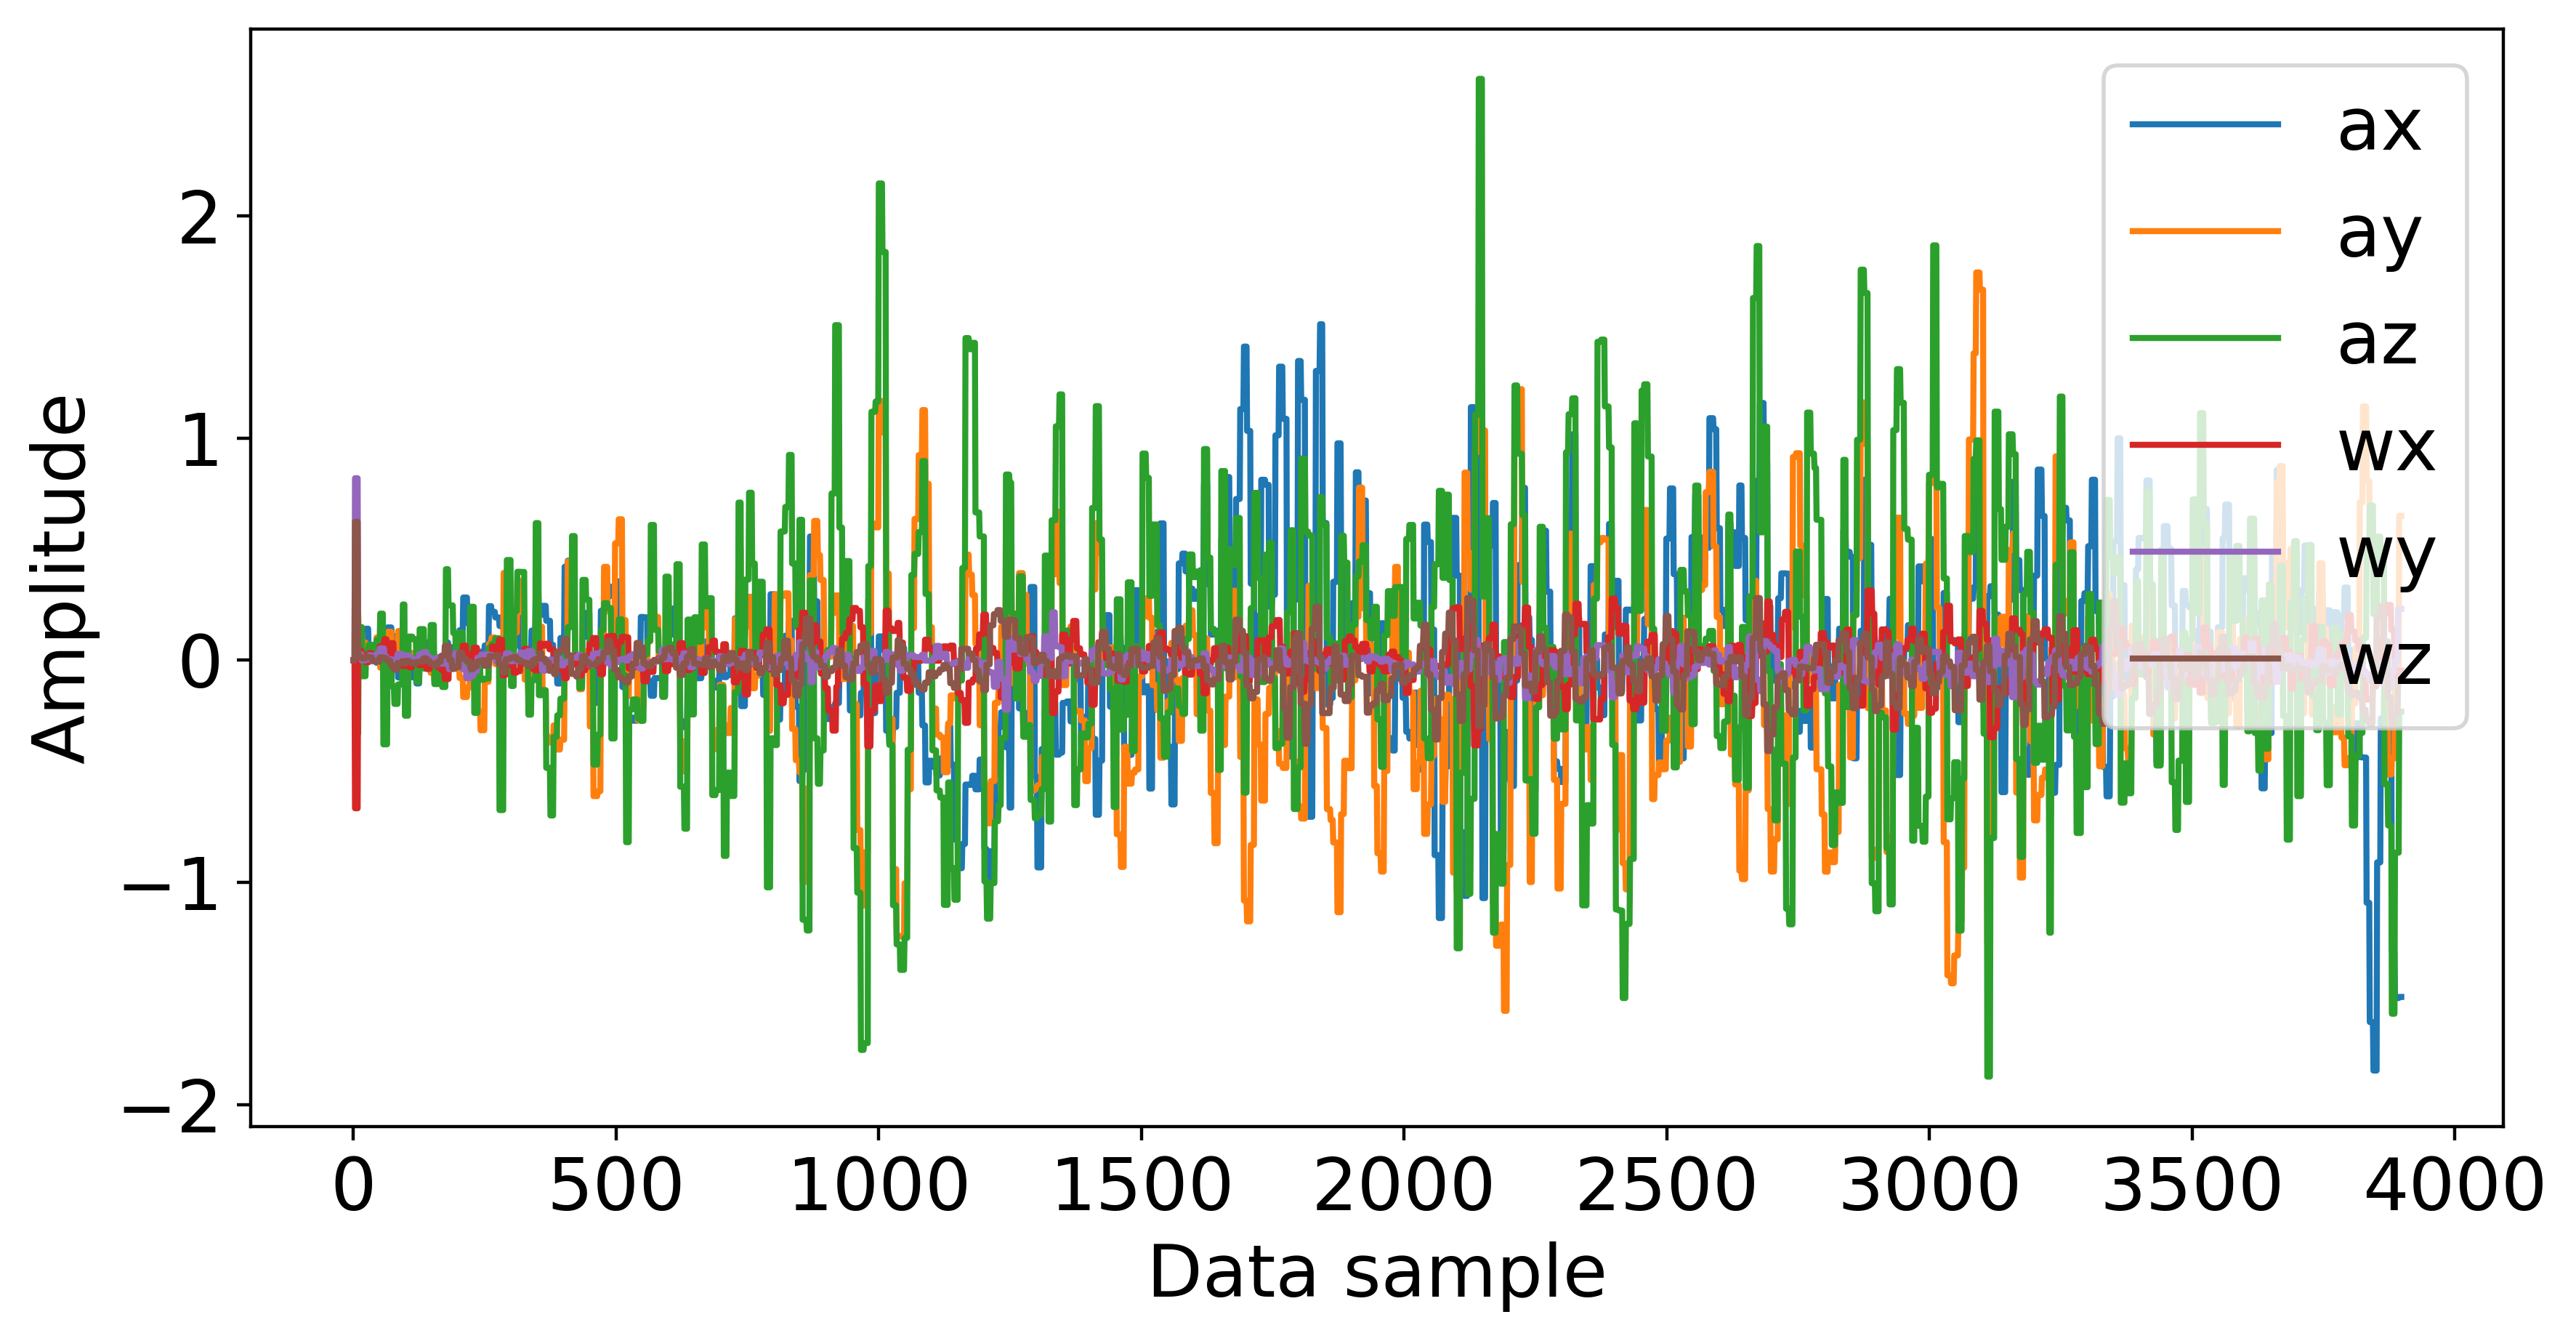

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 18})

rail_ag.plot(xlabel="Data sample", ylabel="Amplitude")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feee3bf7f90>,
      dtype=object)

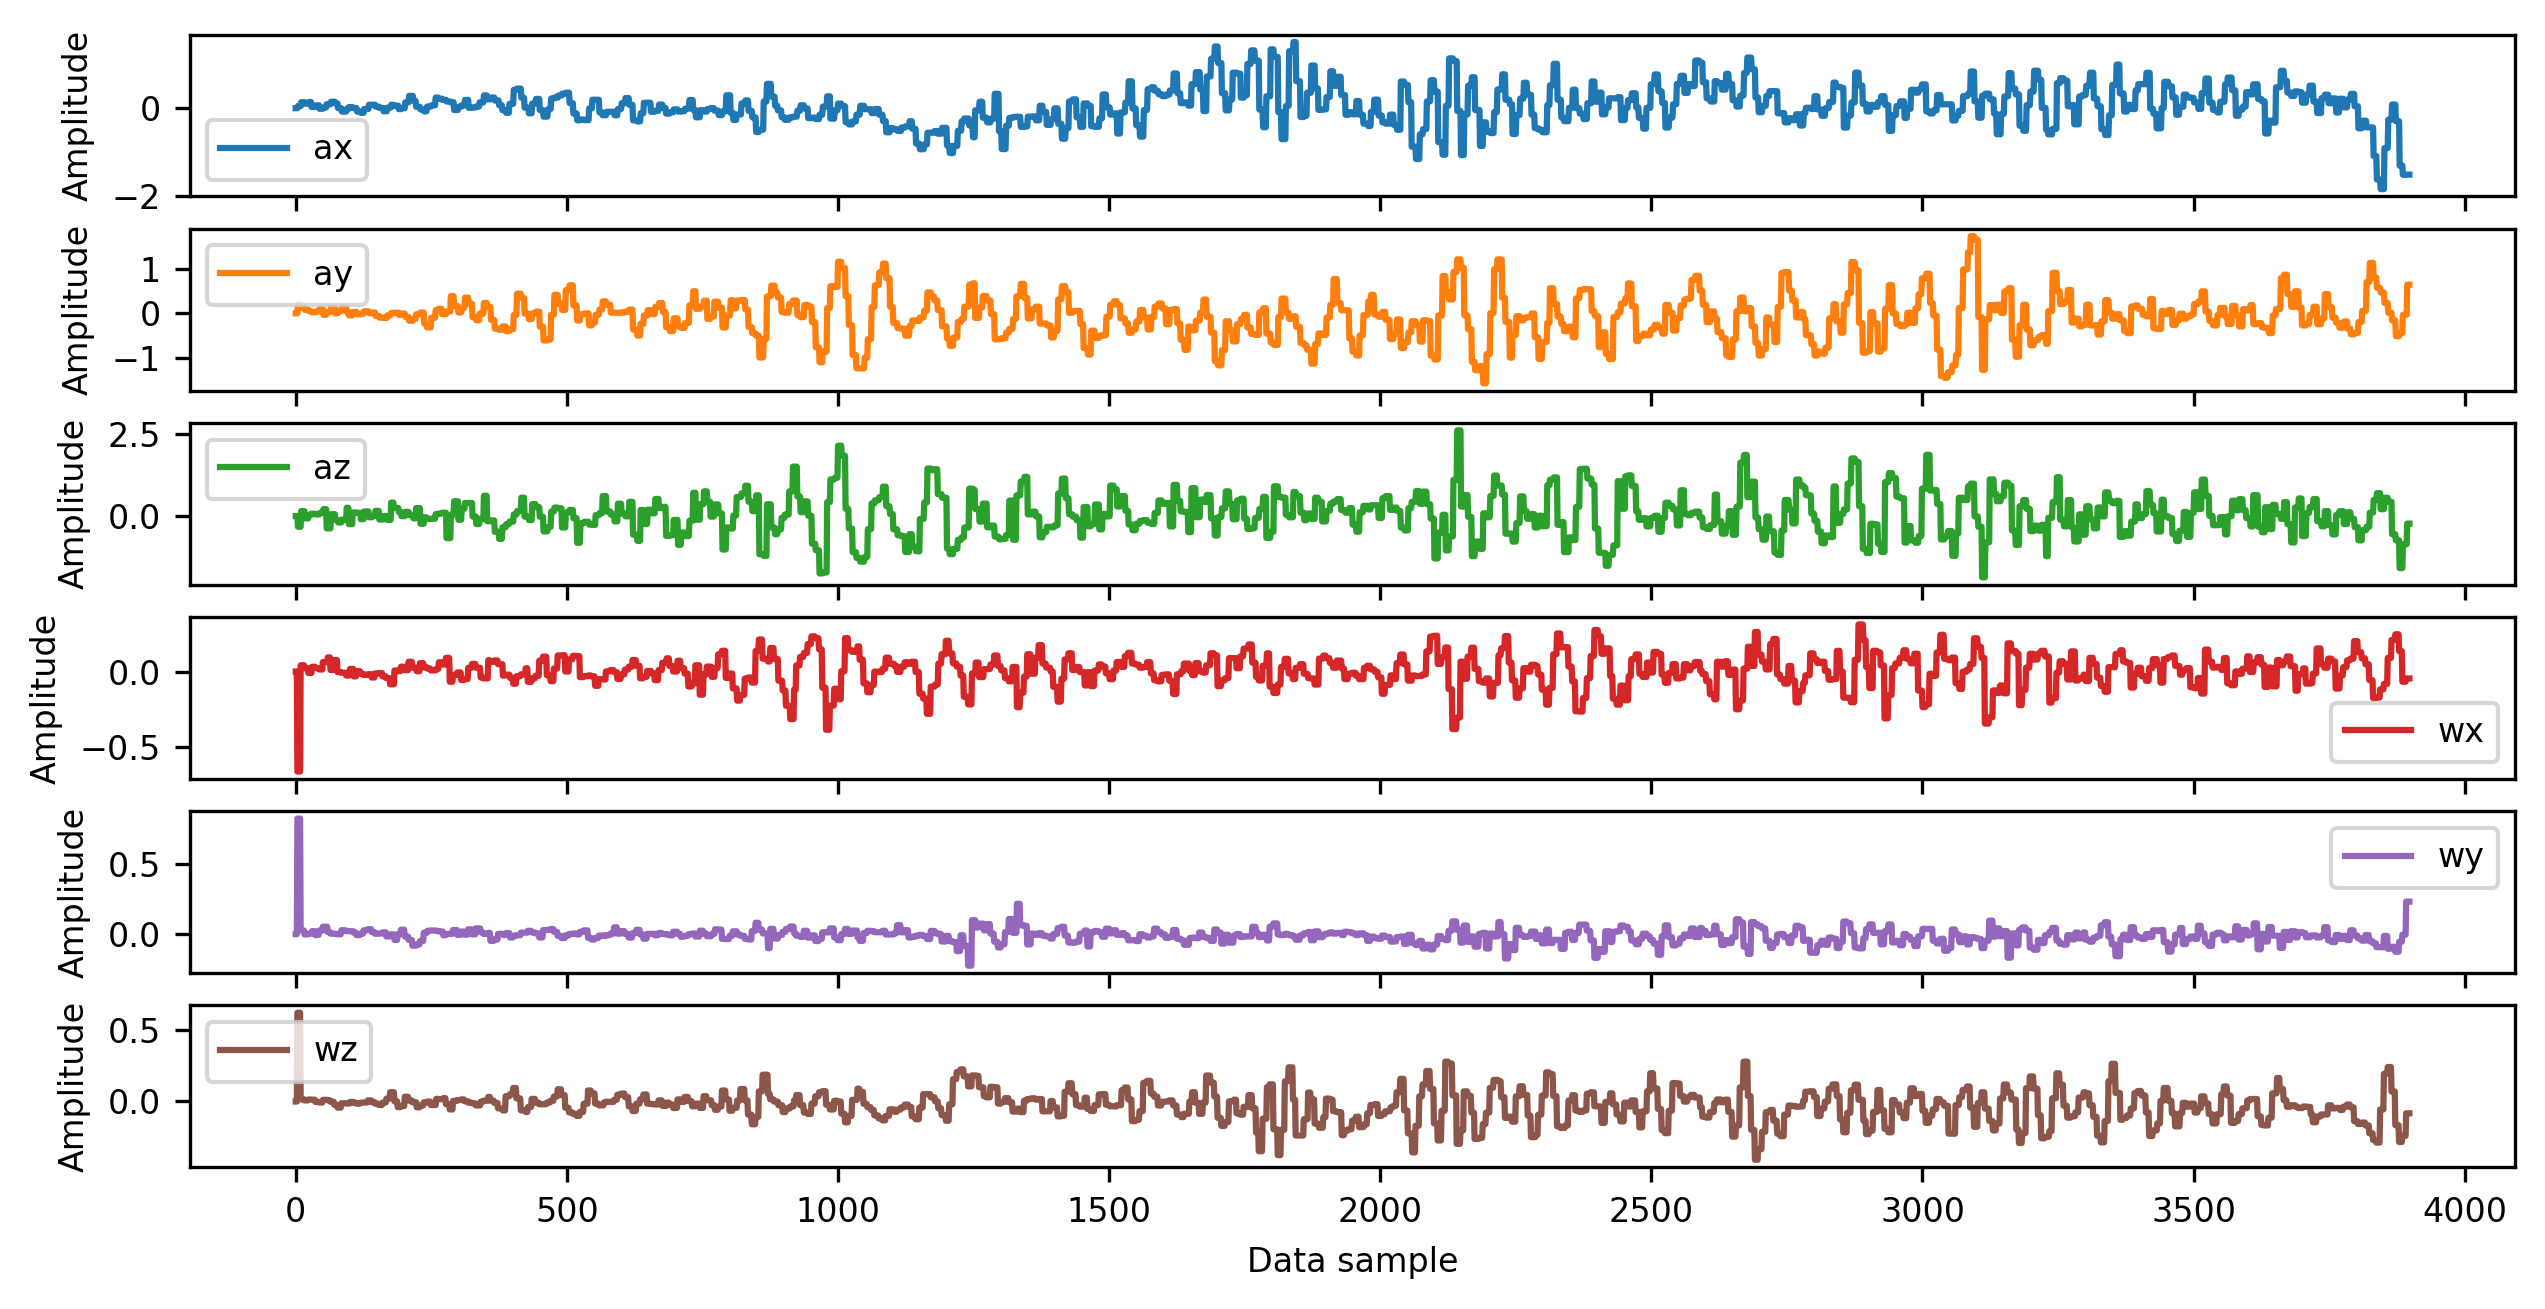

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 8})
rail_ag.plot(xlabel="Data sample", ylabel = 'Amplitude', subplots = True)

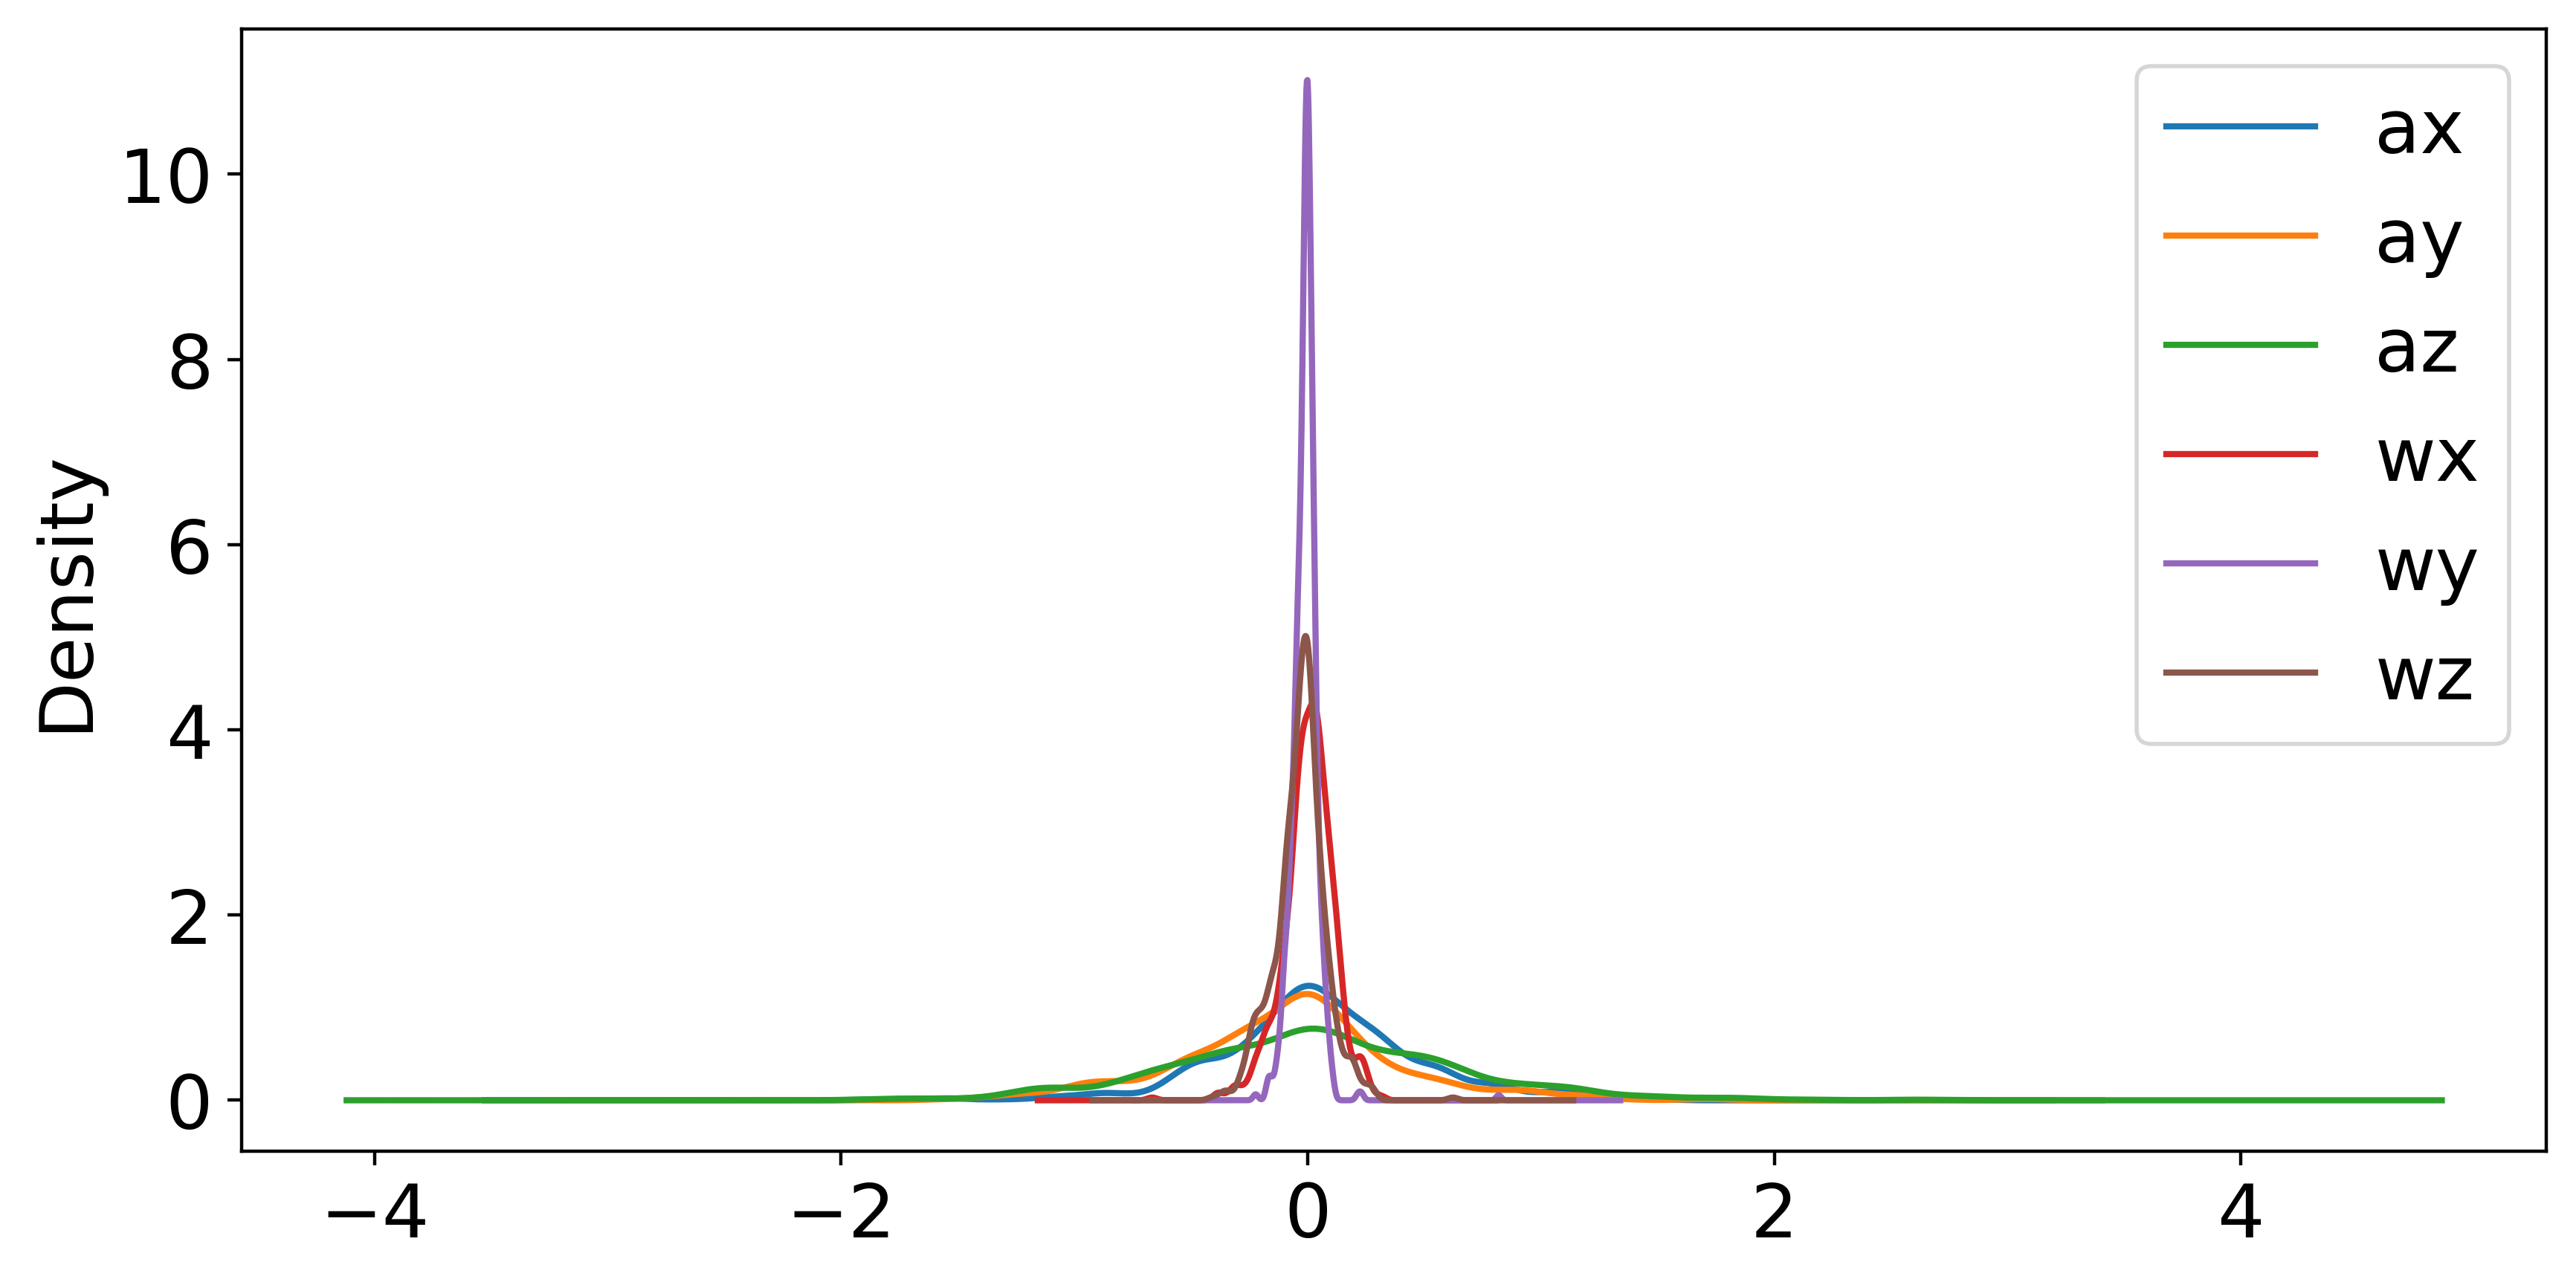

In [ ]:
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 18})
rail_ag.plot(xlabel="Data sample", kind = 'kde')

In [ ]:
rail_ag[0:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude")

In [ ]:
rail_ag[0:2000].plot(xlabel="Data sample", subplots = True)

In [ ]:
rail_ag[000:2000].plot(xlabel="Data sample", subplots = True, kind = 'kde')

In [ ]:
rail_ag[000:2000].plot(xlabel="Data sample", kind = 'kde')

In [ ]:
bus_ag = bus[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
bus_ag

ax      ay      az      wx      wy      wz
0     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
1     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
2     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
3     0.0000  0.0000  0.0000  0.0330 -0.3477  0.1489
4     0.0000  0.0000  0.0000  0.0330 -0.3477  0.1489
...      ...     ...     ...     ...     ...     ...
2850  0.2871  0.1037 -0.1953 -0.1628  0.0084  0.0689
2851  0.1001 -0.0277  0.1021 -0.1628  0.0084  0.0689
2852  0.1001 -0.0277  0.1021 -0.1628  0.0084  0.0689
2853  0.1001 -0.0277  0.1021 -0.0157 -0.1060  0.0312
2854  0.1001 -0.0277  0.1021 -0.0157 -0.1060  0.0312

[2855 rows x 6 columns]

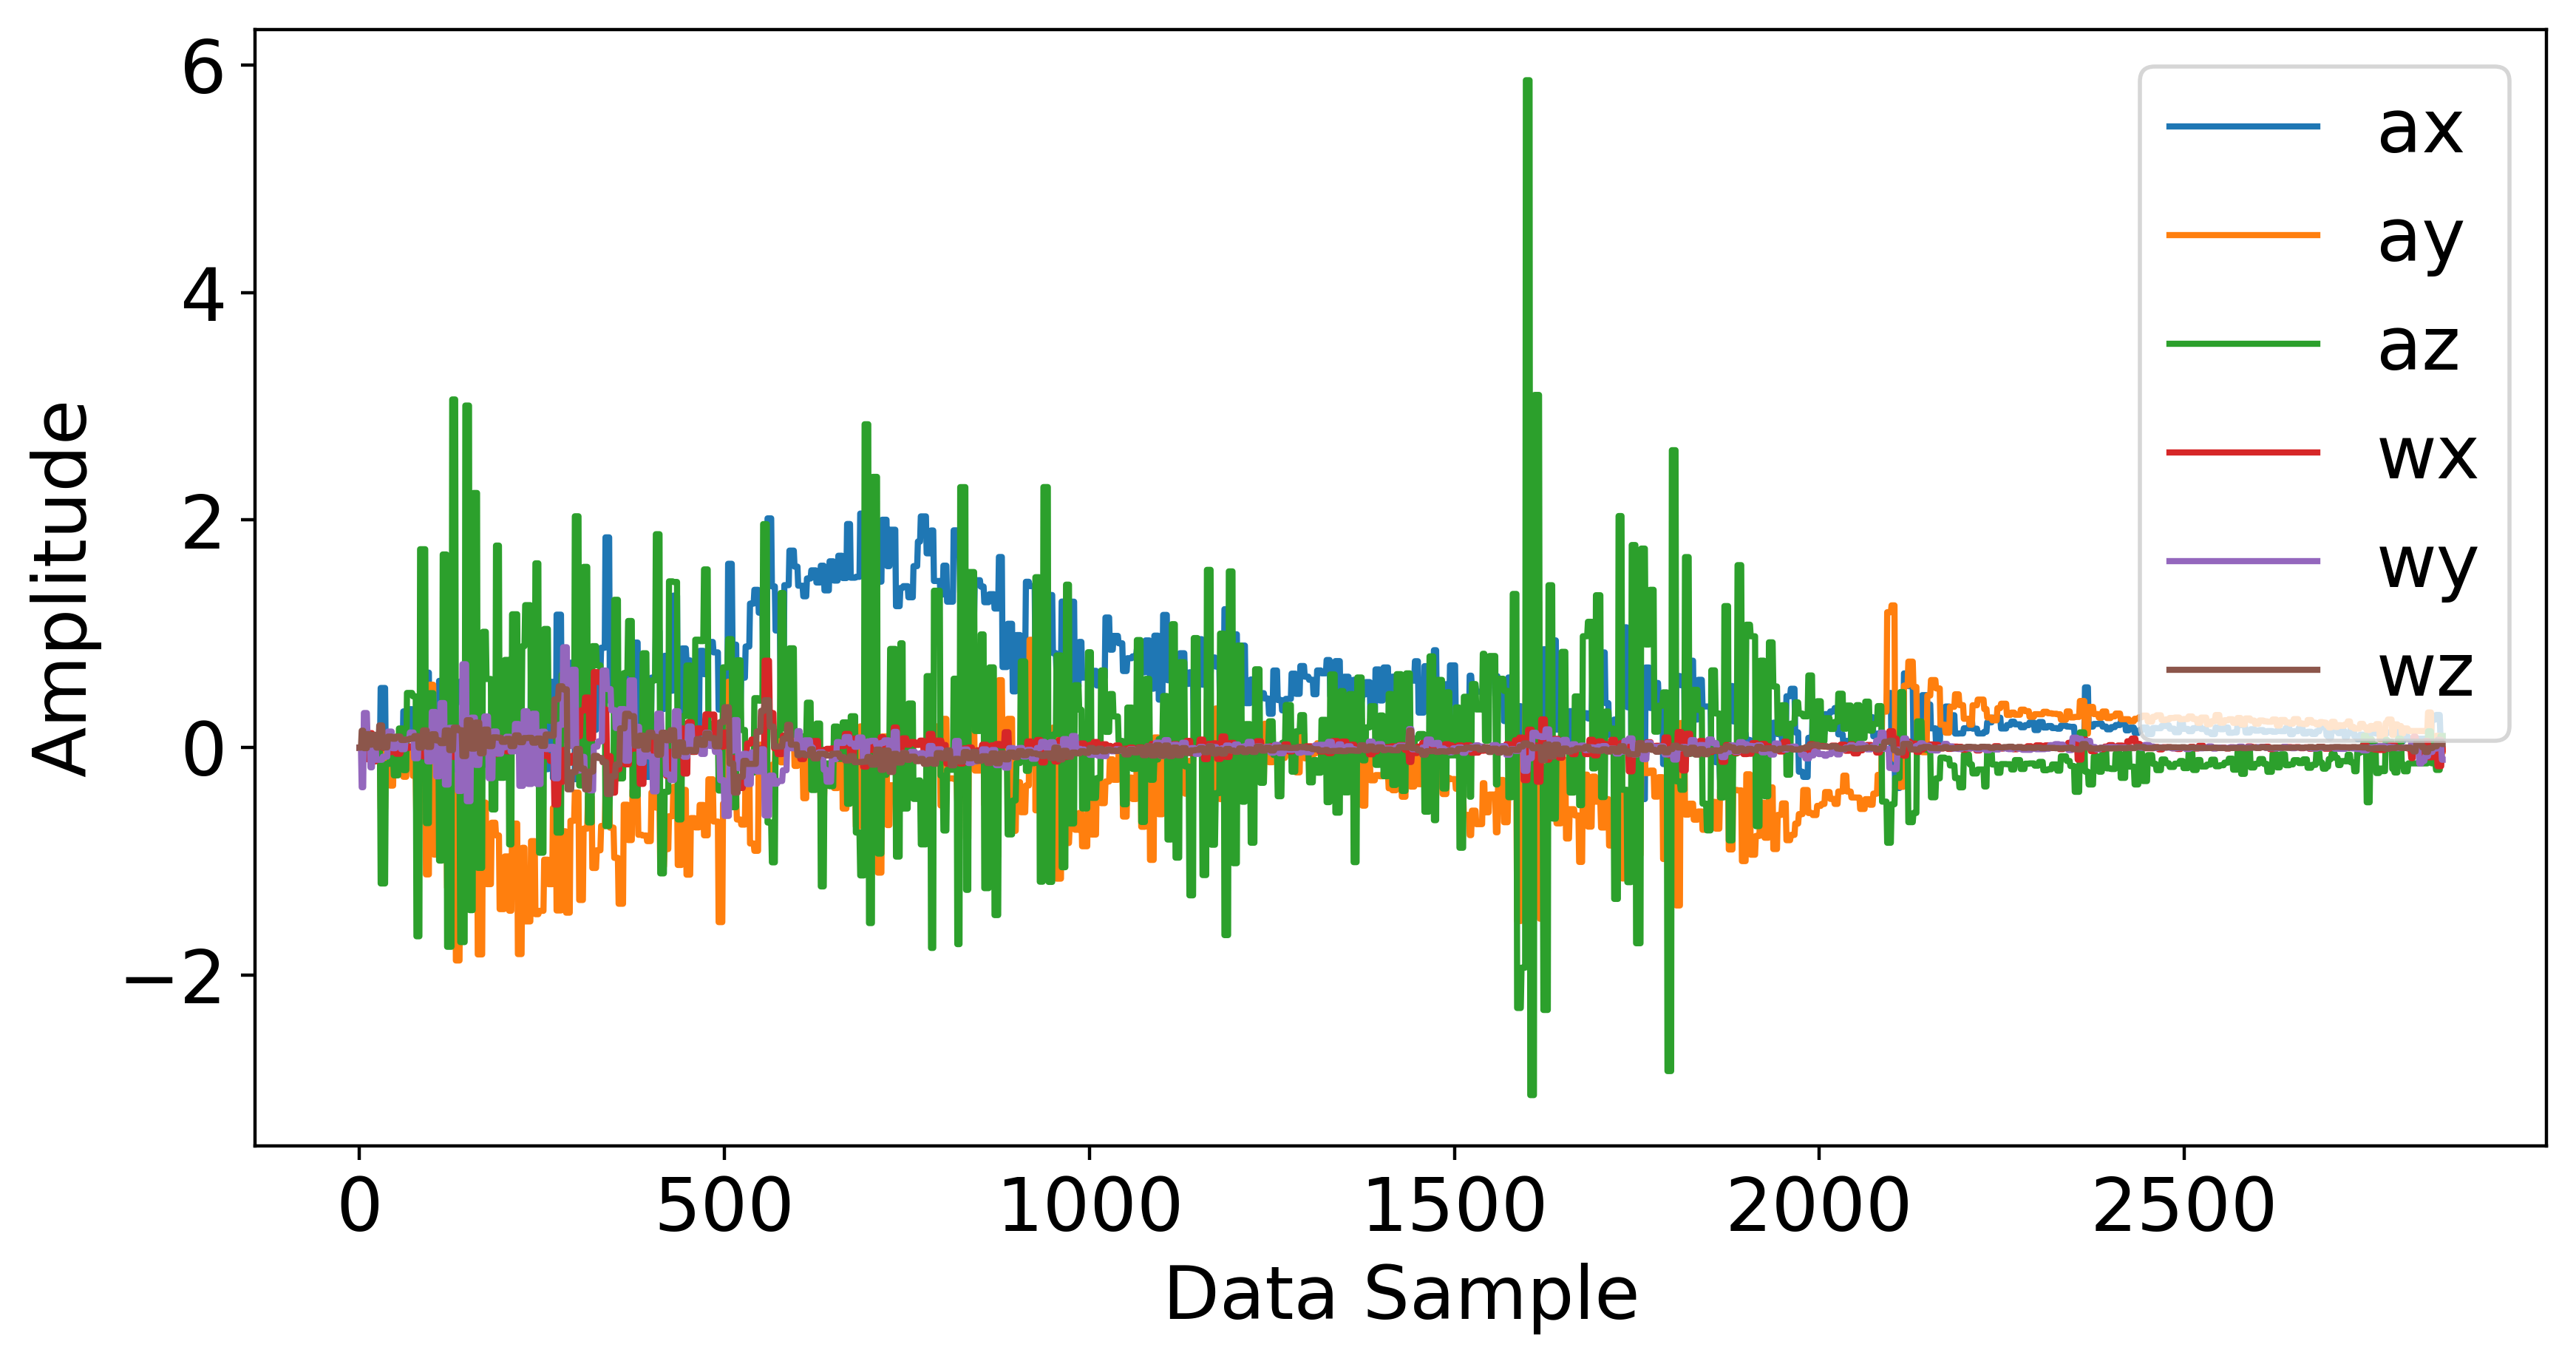

In [ ]:
bus_ag.plot(xlabel = "Data Sample", ylabel = "Amplitude")

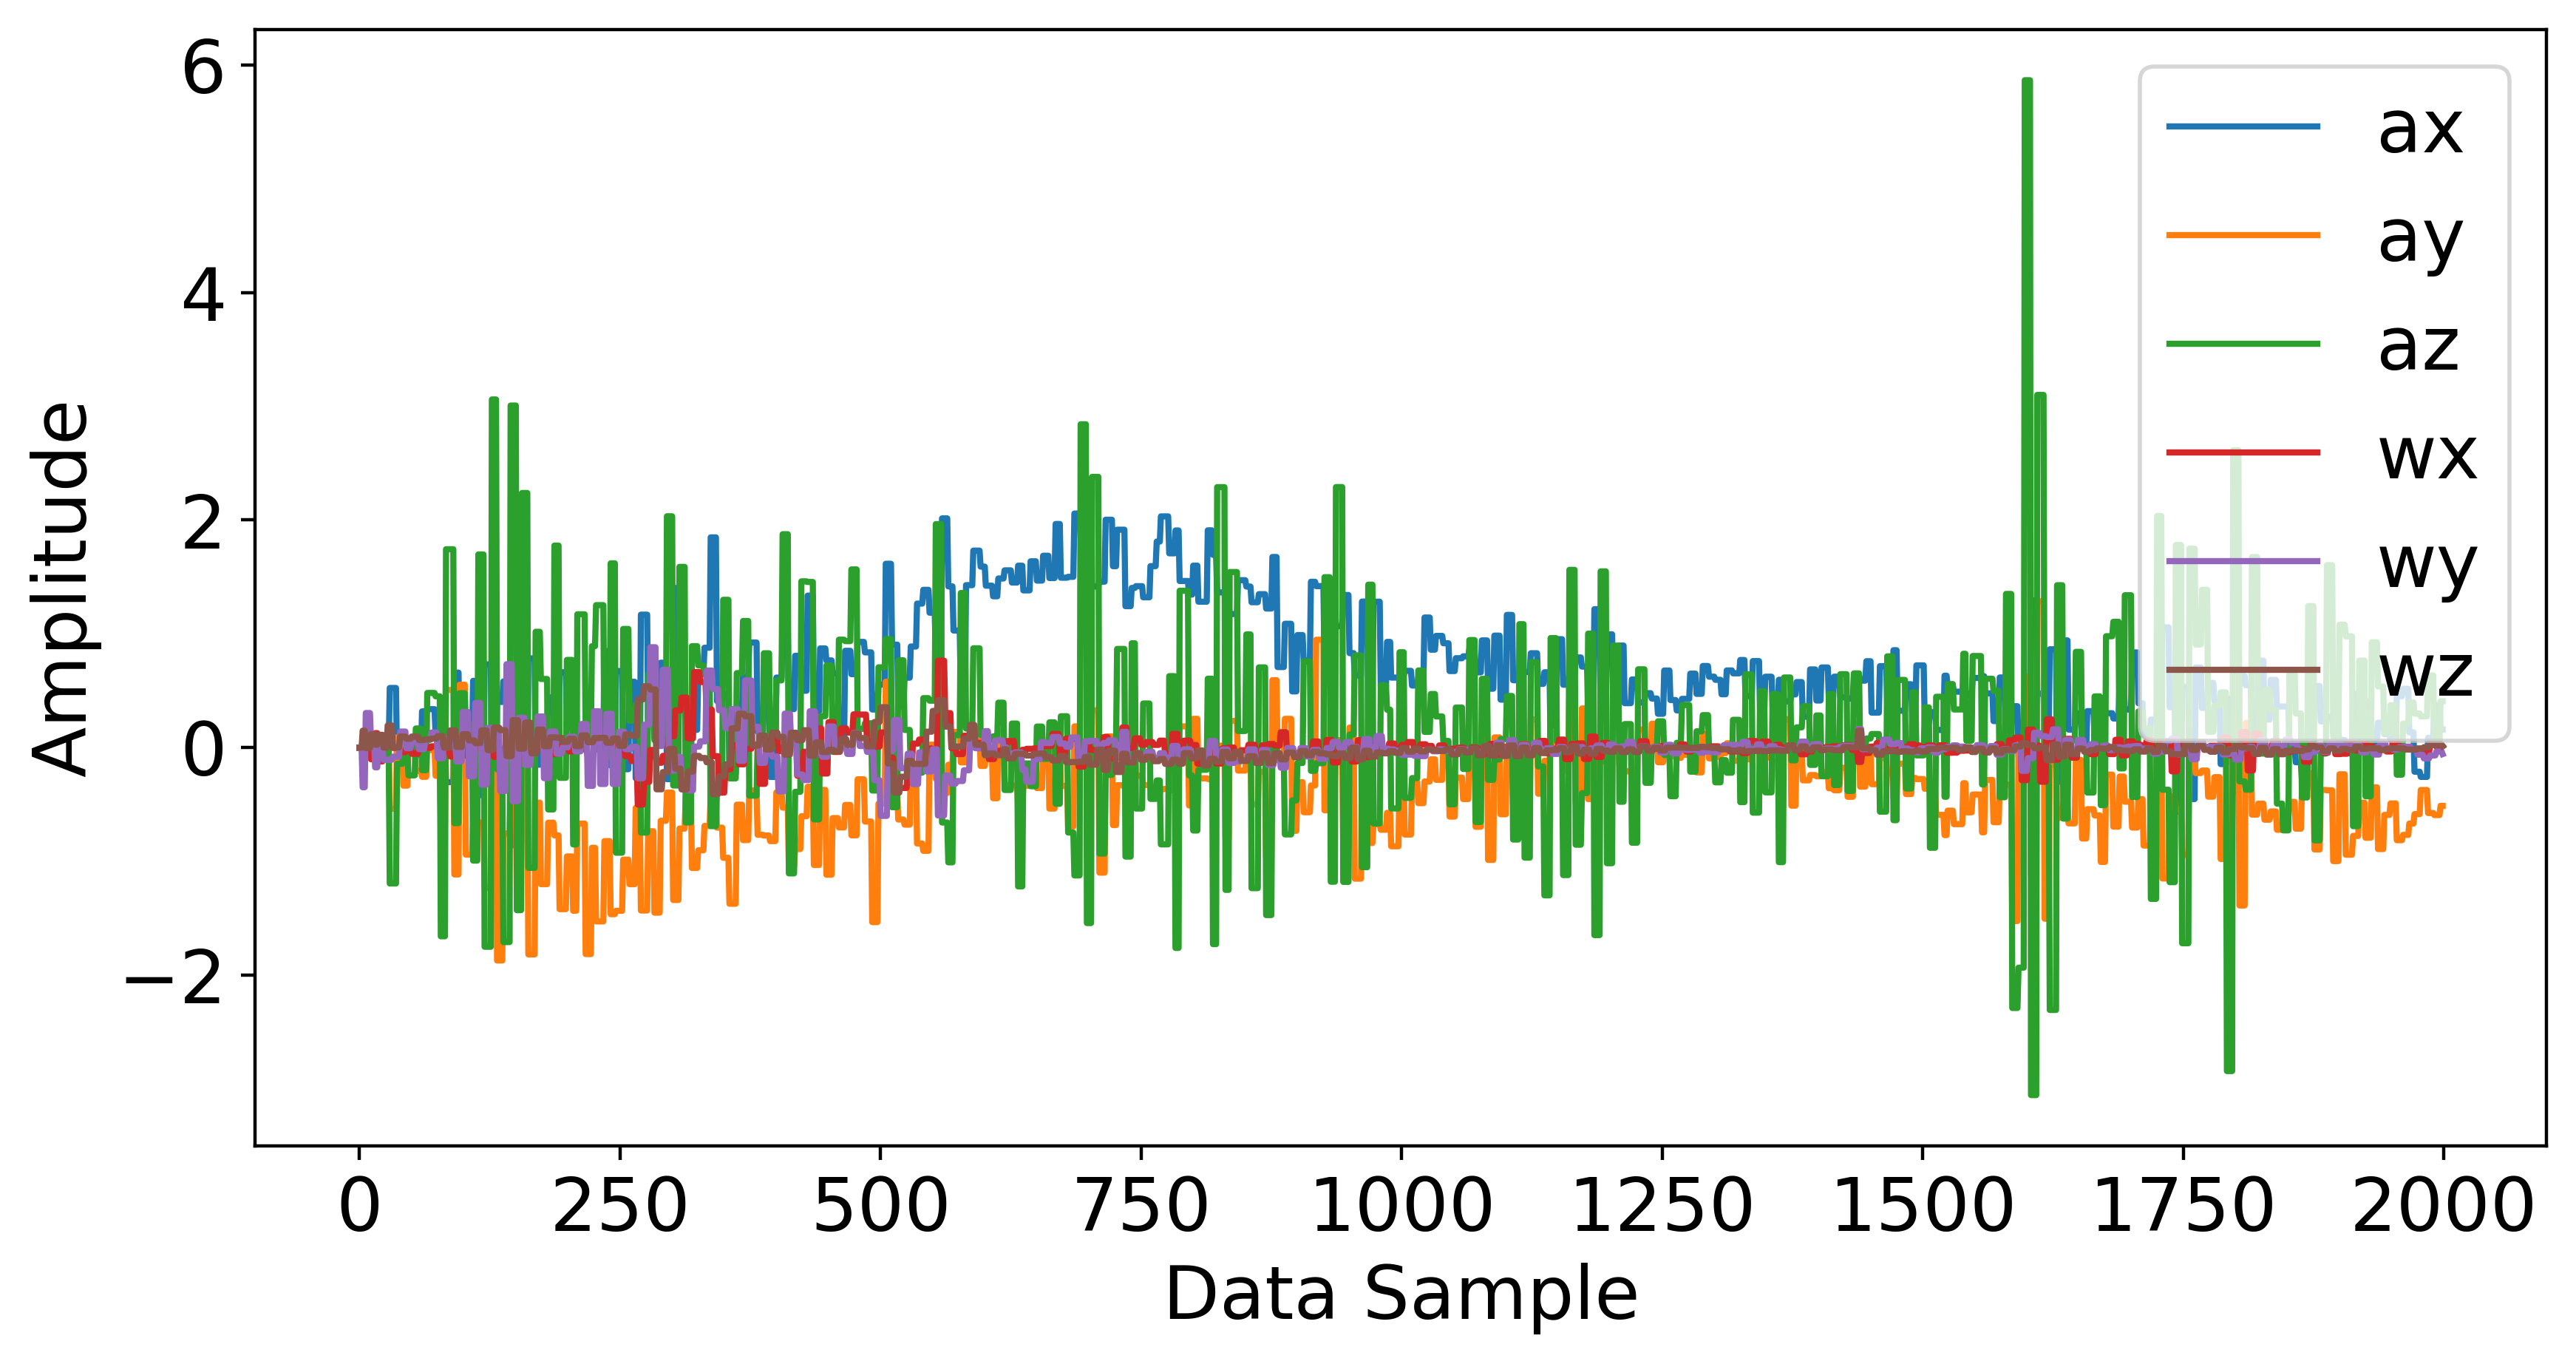

In [ ]:
bus_ag[000:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude")

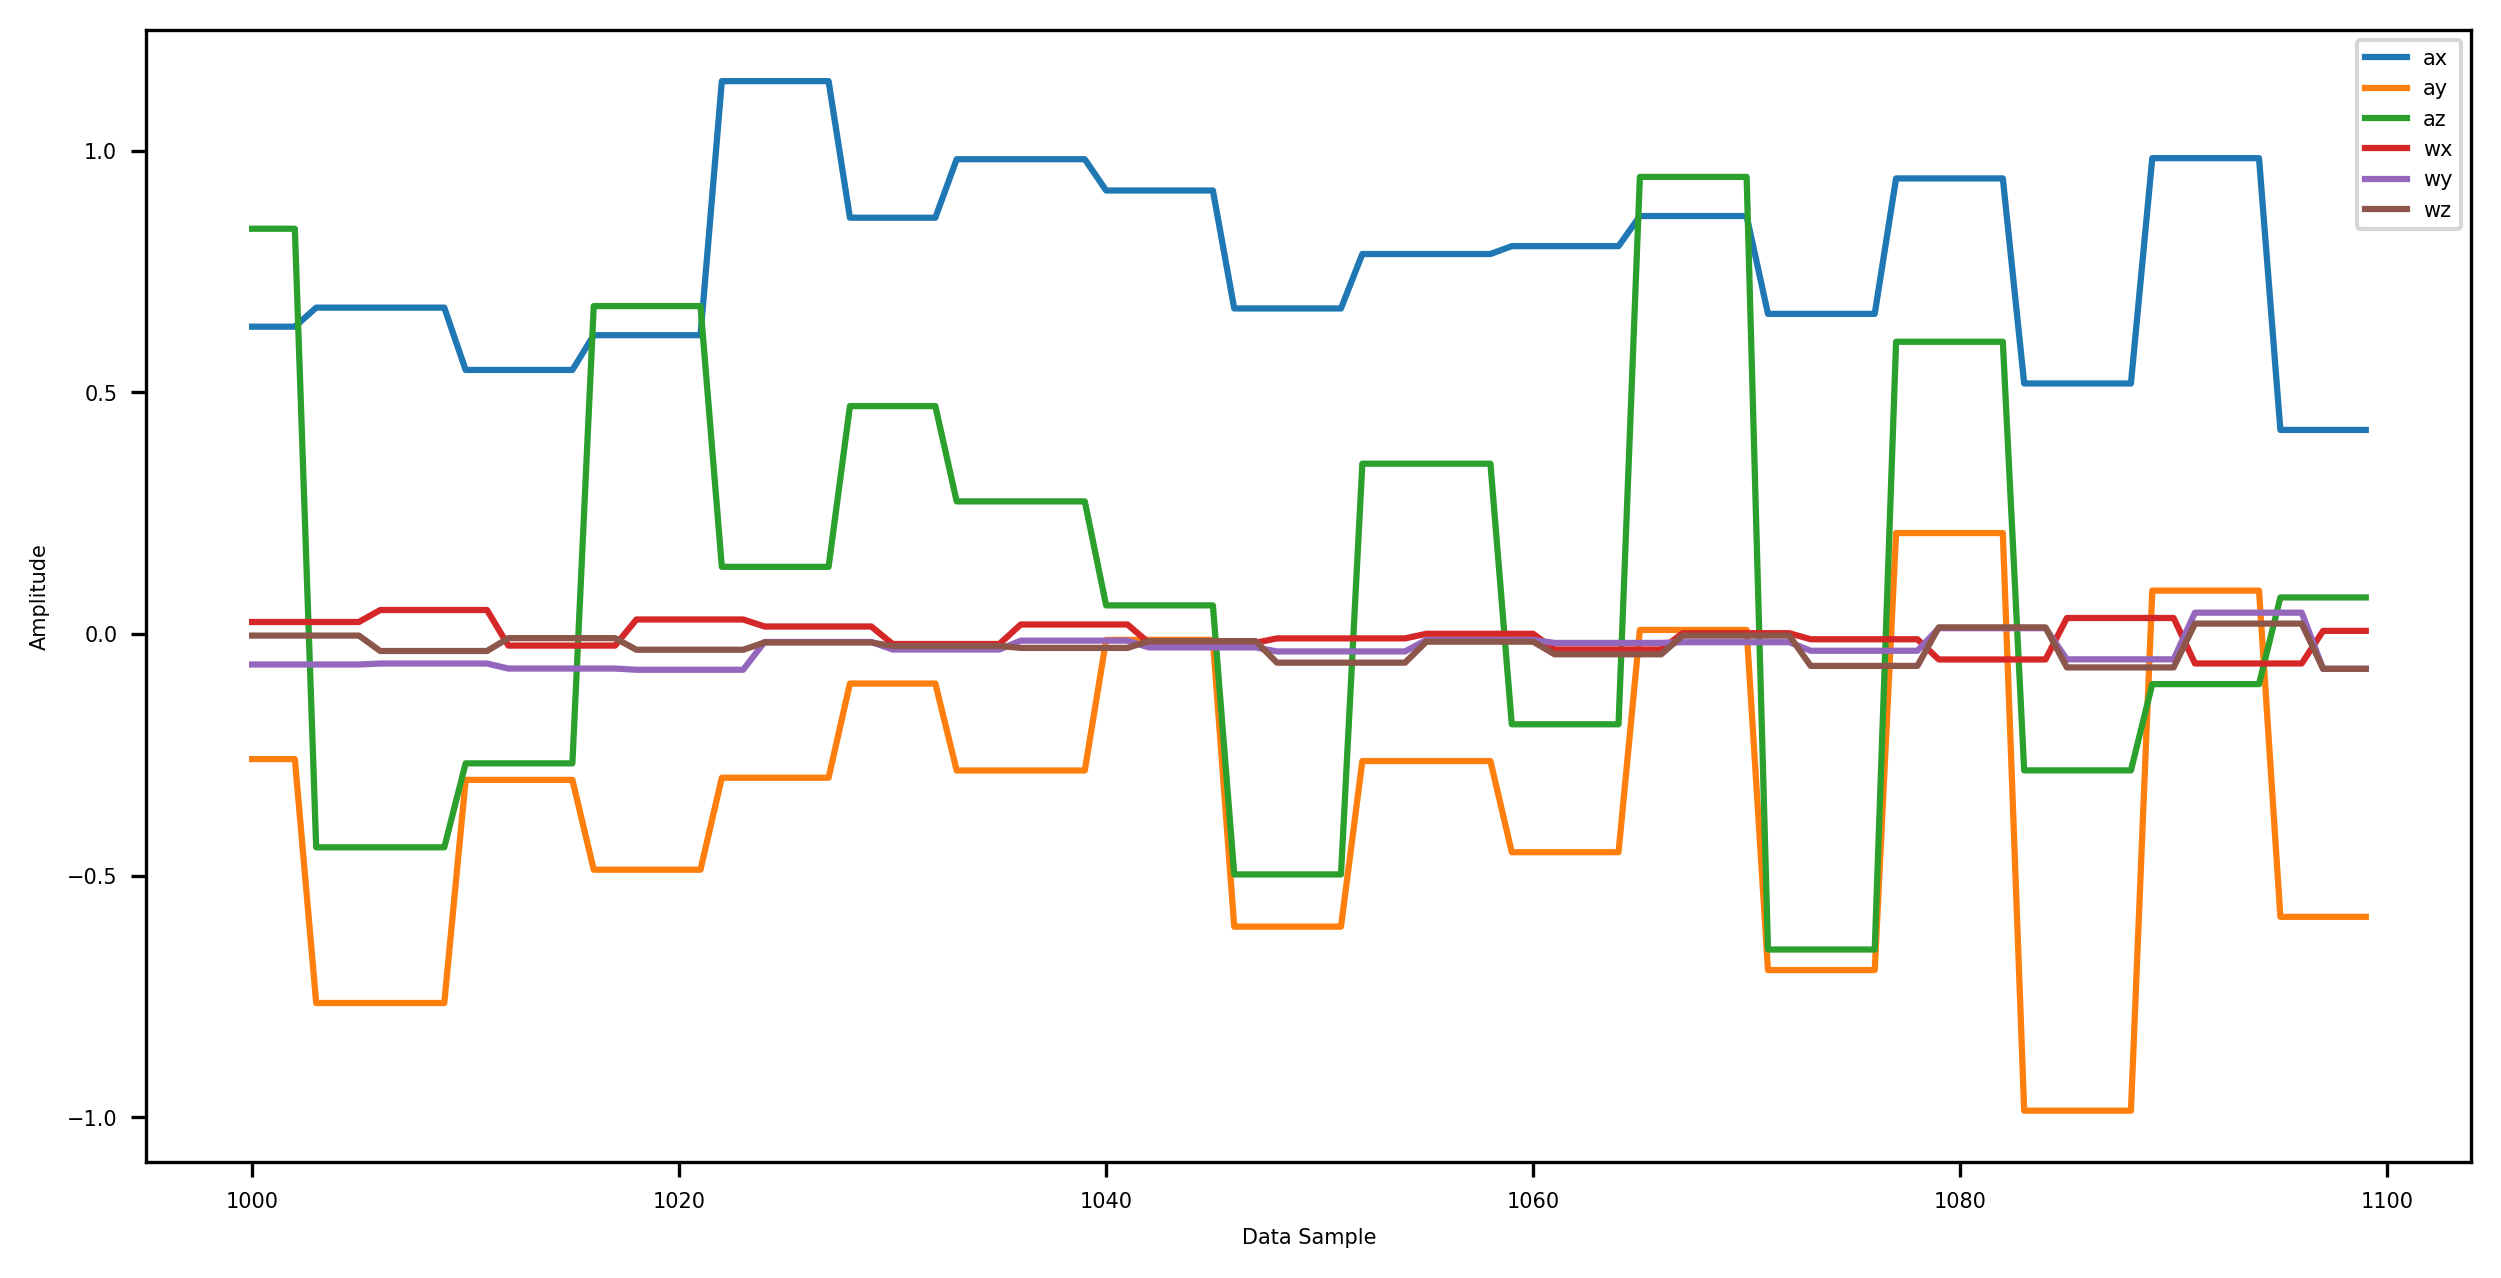

In [ ]:
bus_ag[1000:1100].plot(xlabel = "Data Sample", ylabel = "Amplitude")

In [ ]:
bus_ag[000:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude", kind = 'kde', subplots = True)

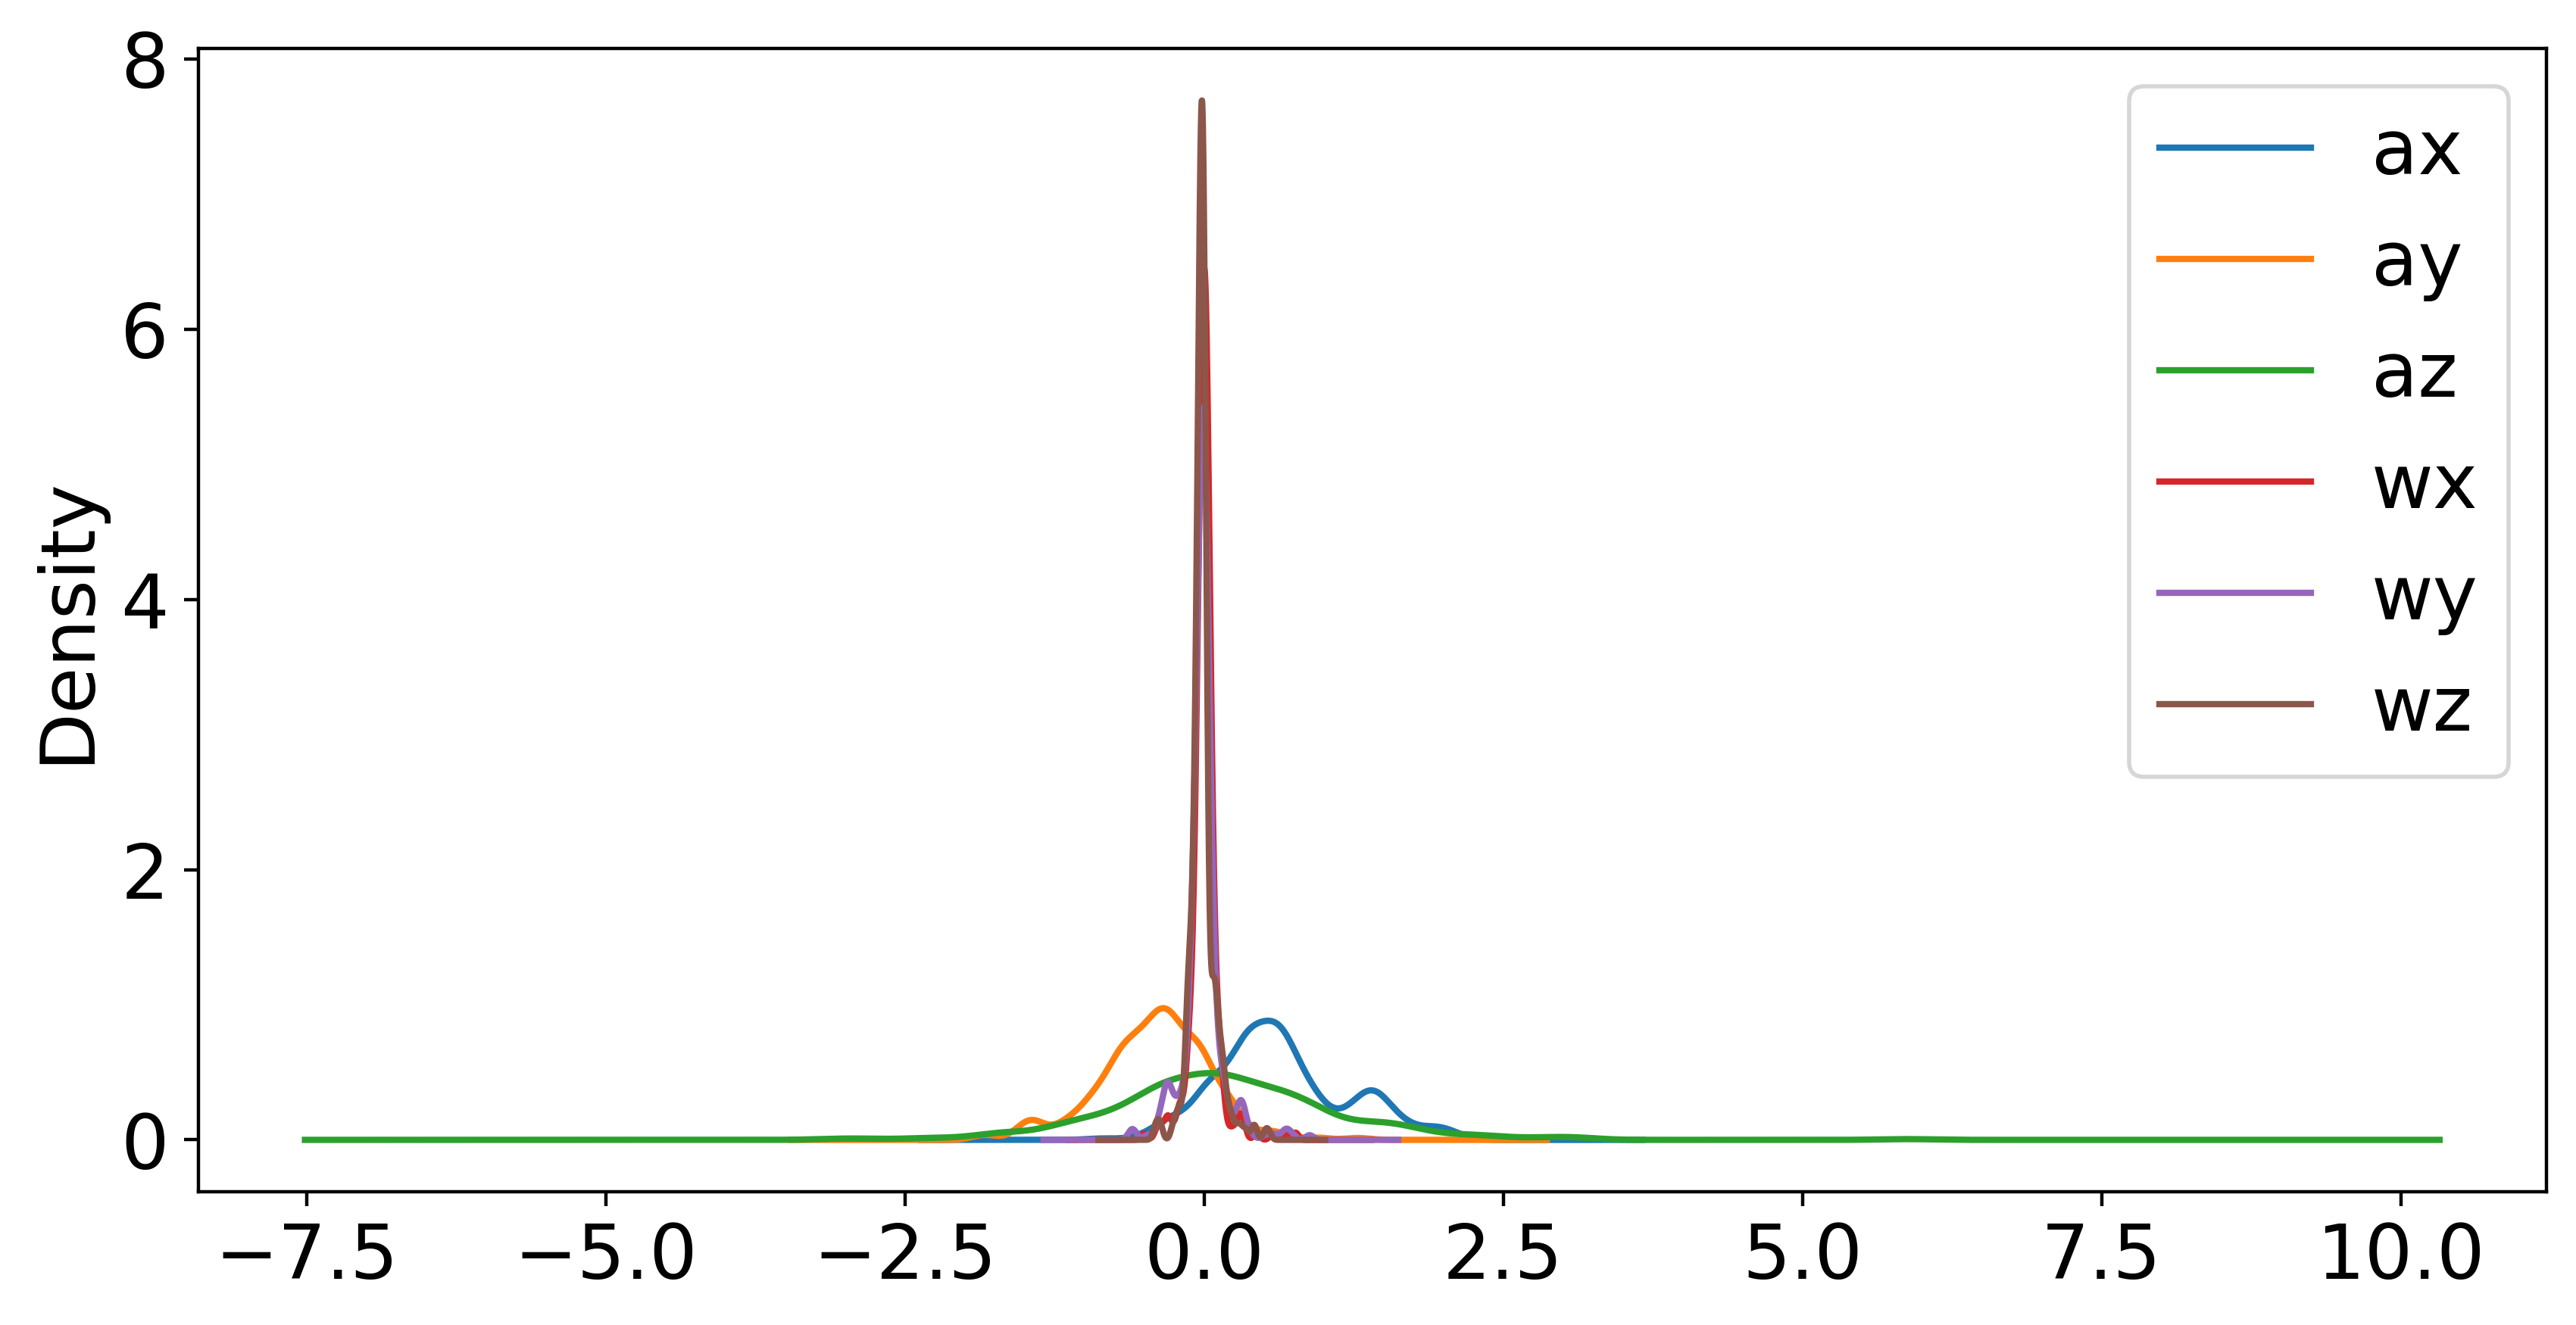

In [ ]:
bus_ag[000:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude", kind = 'kde')

In [ ]:
bike_ag = bike[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
bike_ag

ax      ay      az      wx      wy      wz
0      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
1      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
2      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
3      0.0000  0.0000  0.0000  0.0037  0.0182 -0.0008
4      0.3825 -0.0777  0.0023  0.0037  0.0182 -0.0008
...       ...     ...     ...     ...     ...     ...
35510  0.1964 -0.5849 -0.4808  0.1224  0.1264 -0.0318
35511  0.1964 -0.5849 -0.4808  0.1224  0.1264 -0.0318
35512  0.1964 -0.5849 -0.4808 -0.0794 -0.0005  0.1415
35513  0.2061 -0.3098 -0.5186 -0.0794 -0.0005  0.1415
35514  0.2061 -0.3098 -0.5186 -0.0794 -0.0005  0.1415

[35515 rows x 6 columns]

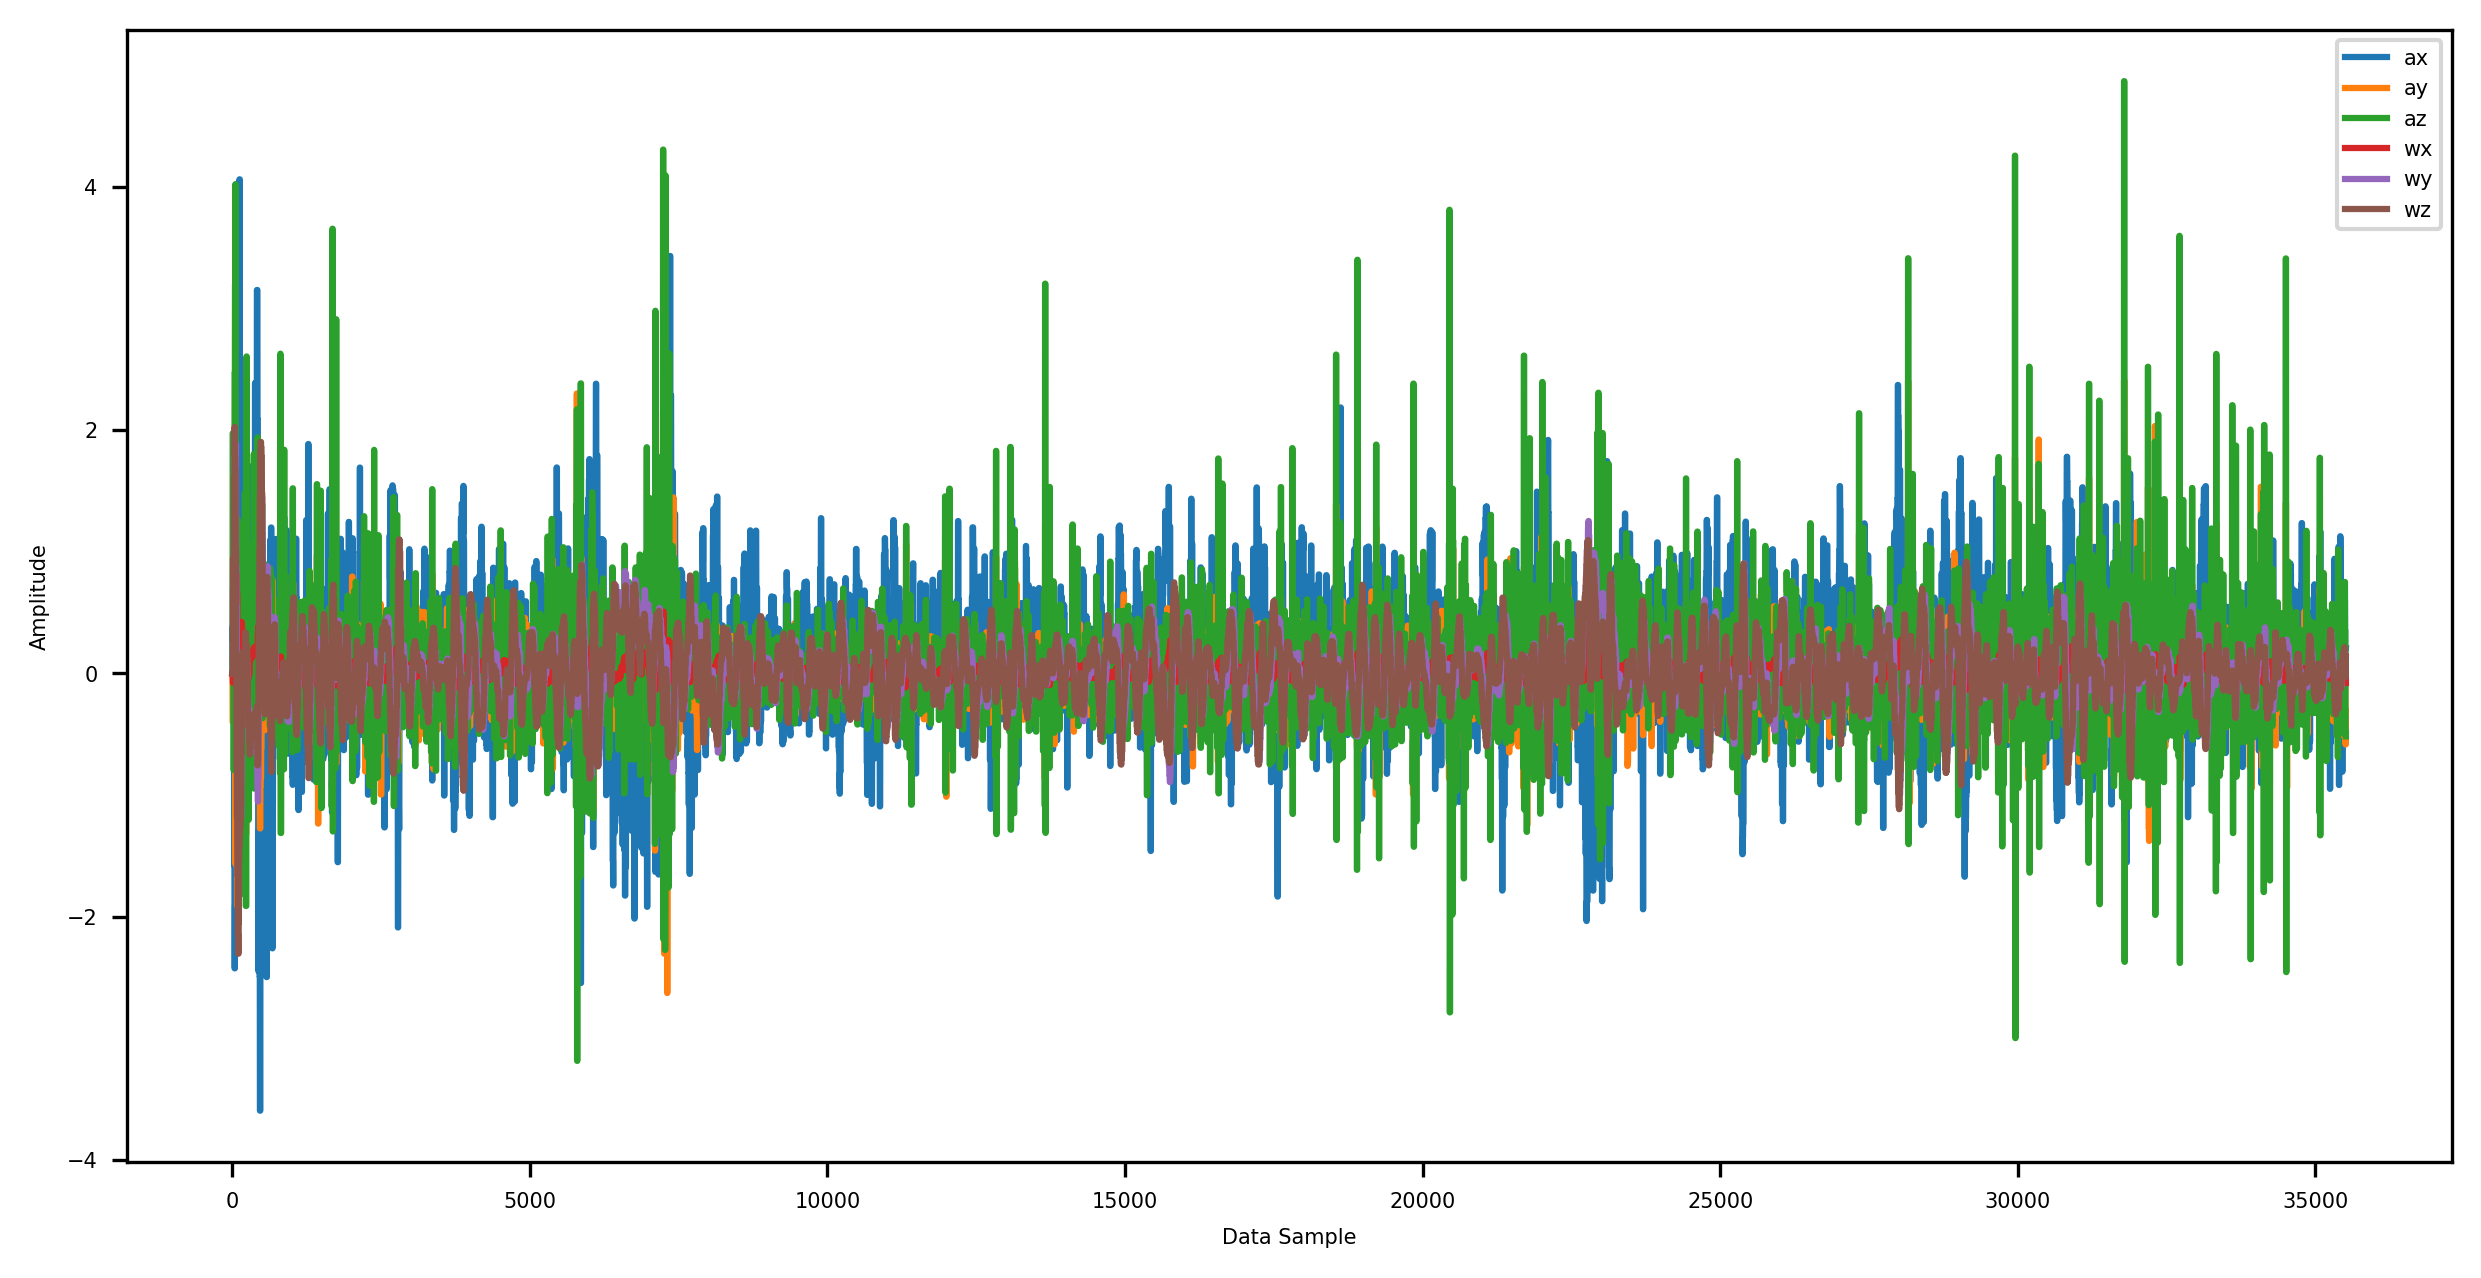

In [ ]:
bike_ag.plot(xlabel = "Data Sample", ylabel = "Amplitude")

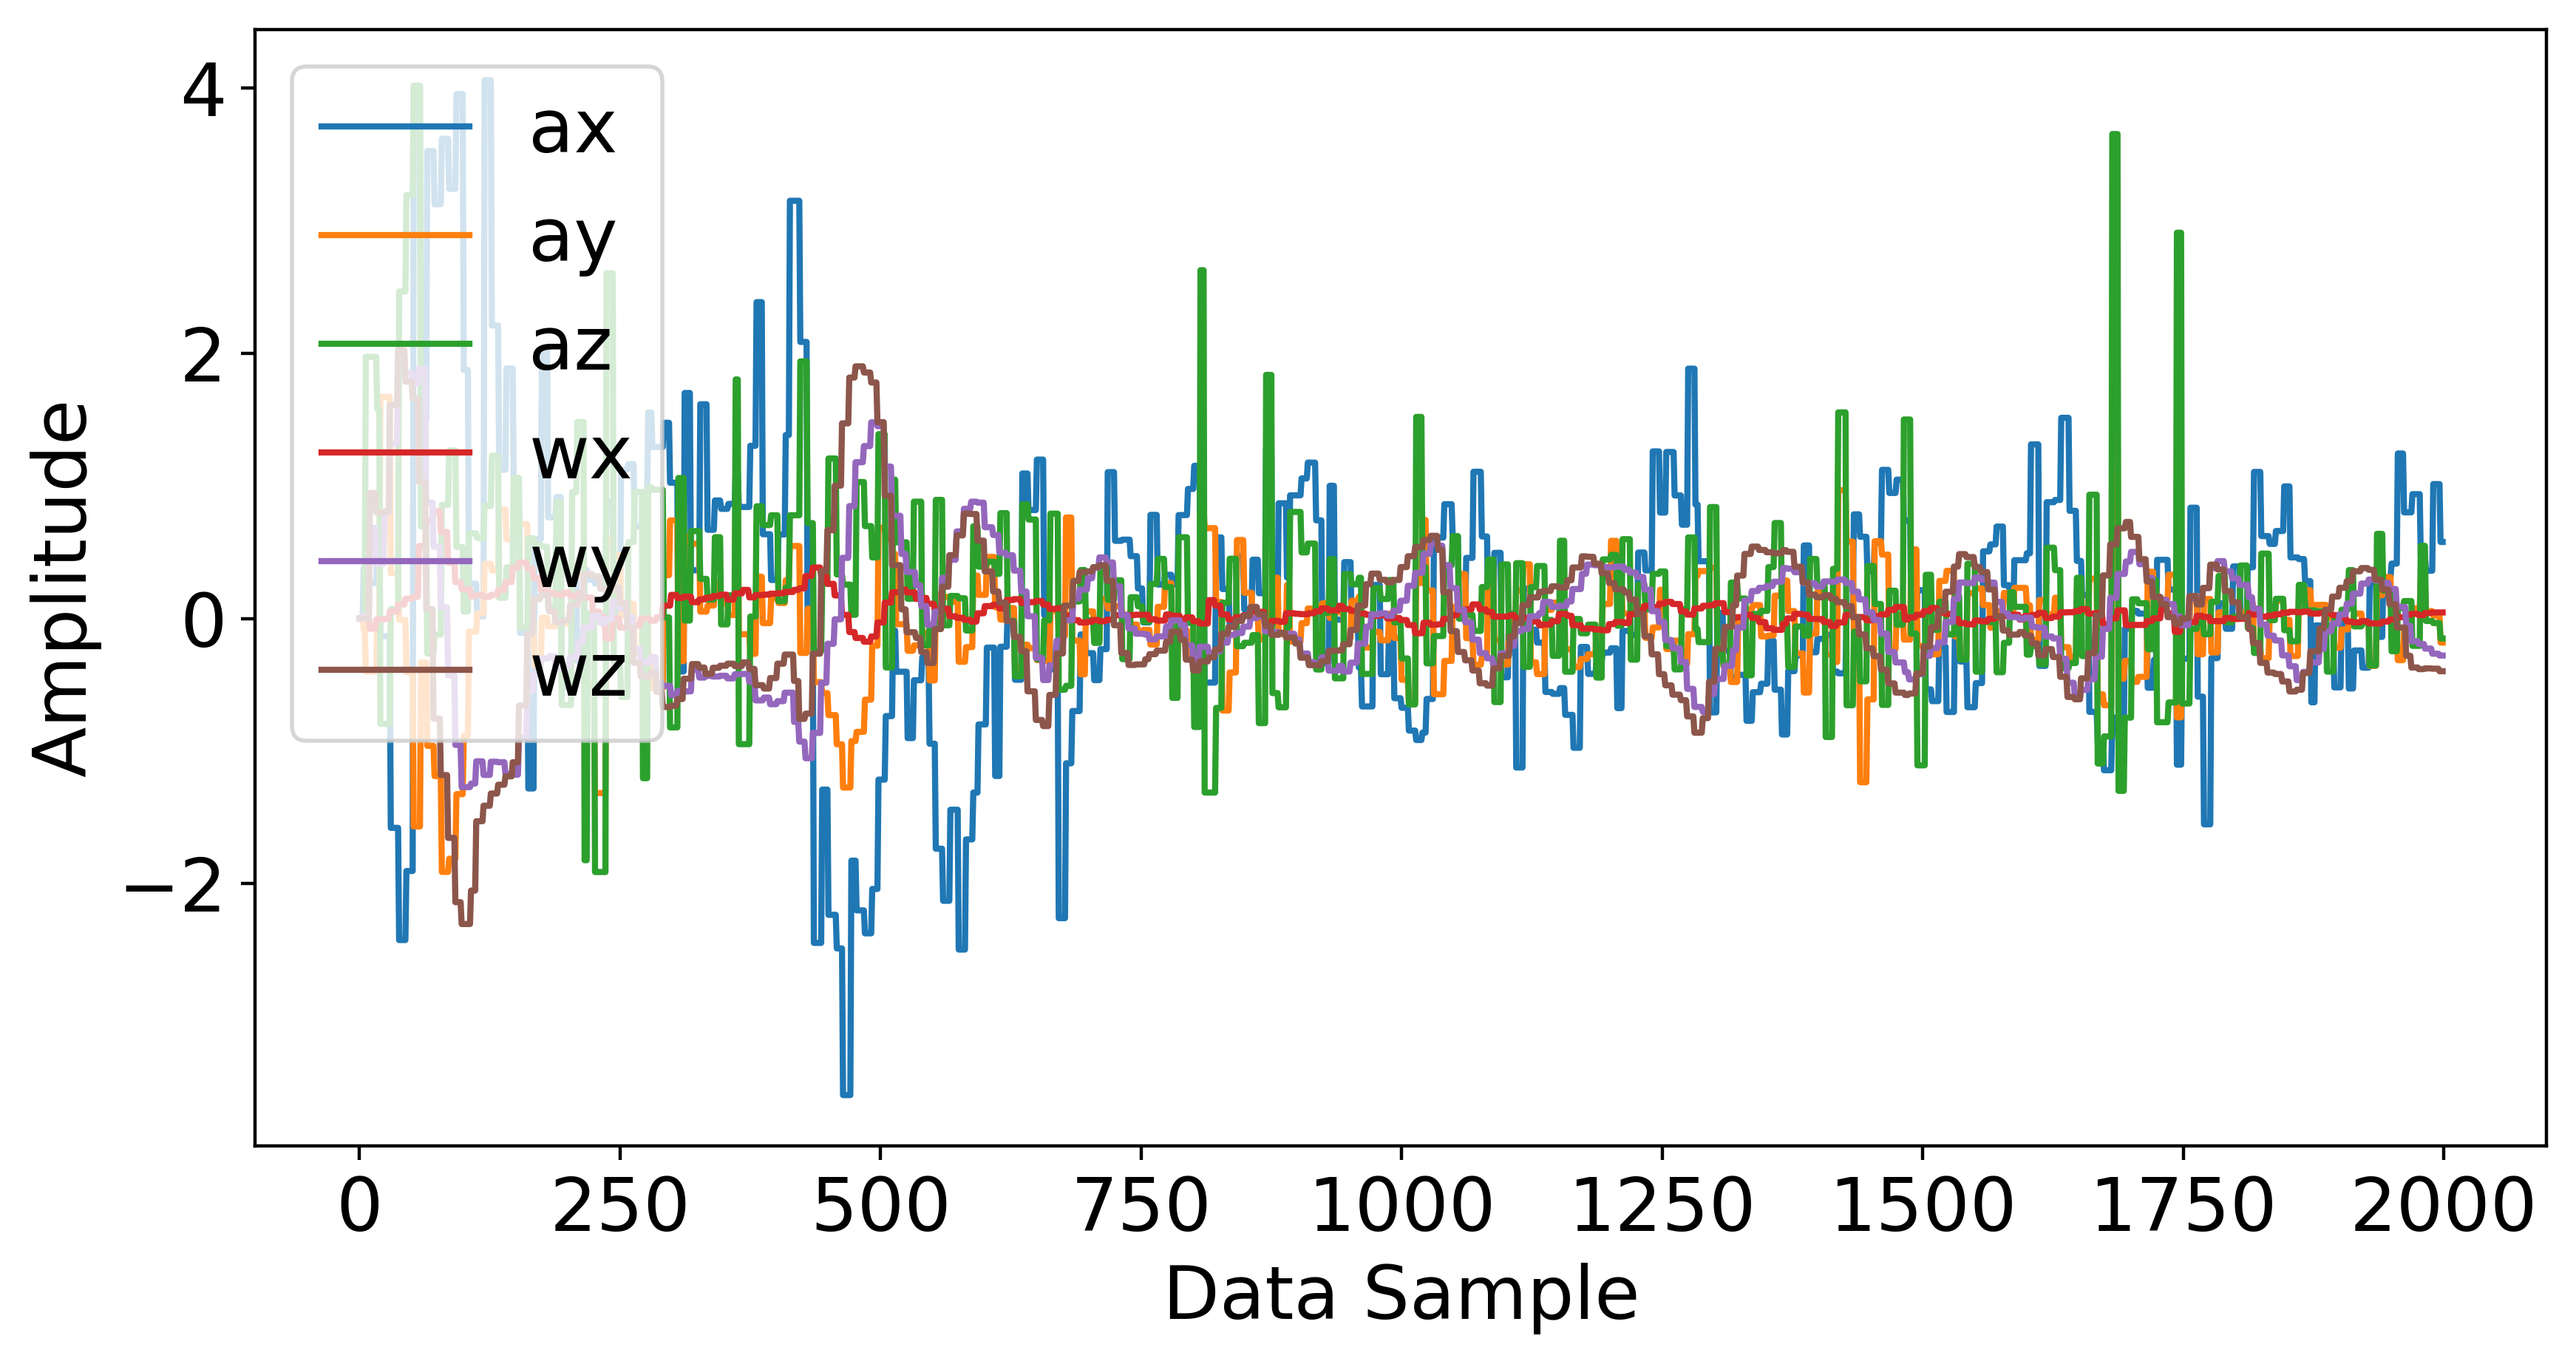

In [ ]:
bike_ag[:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude")

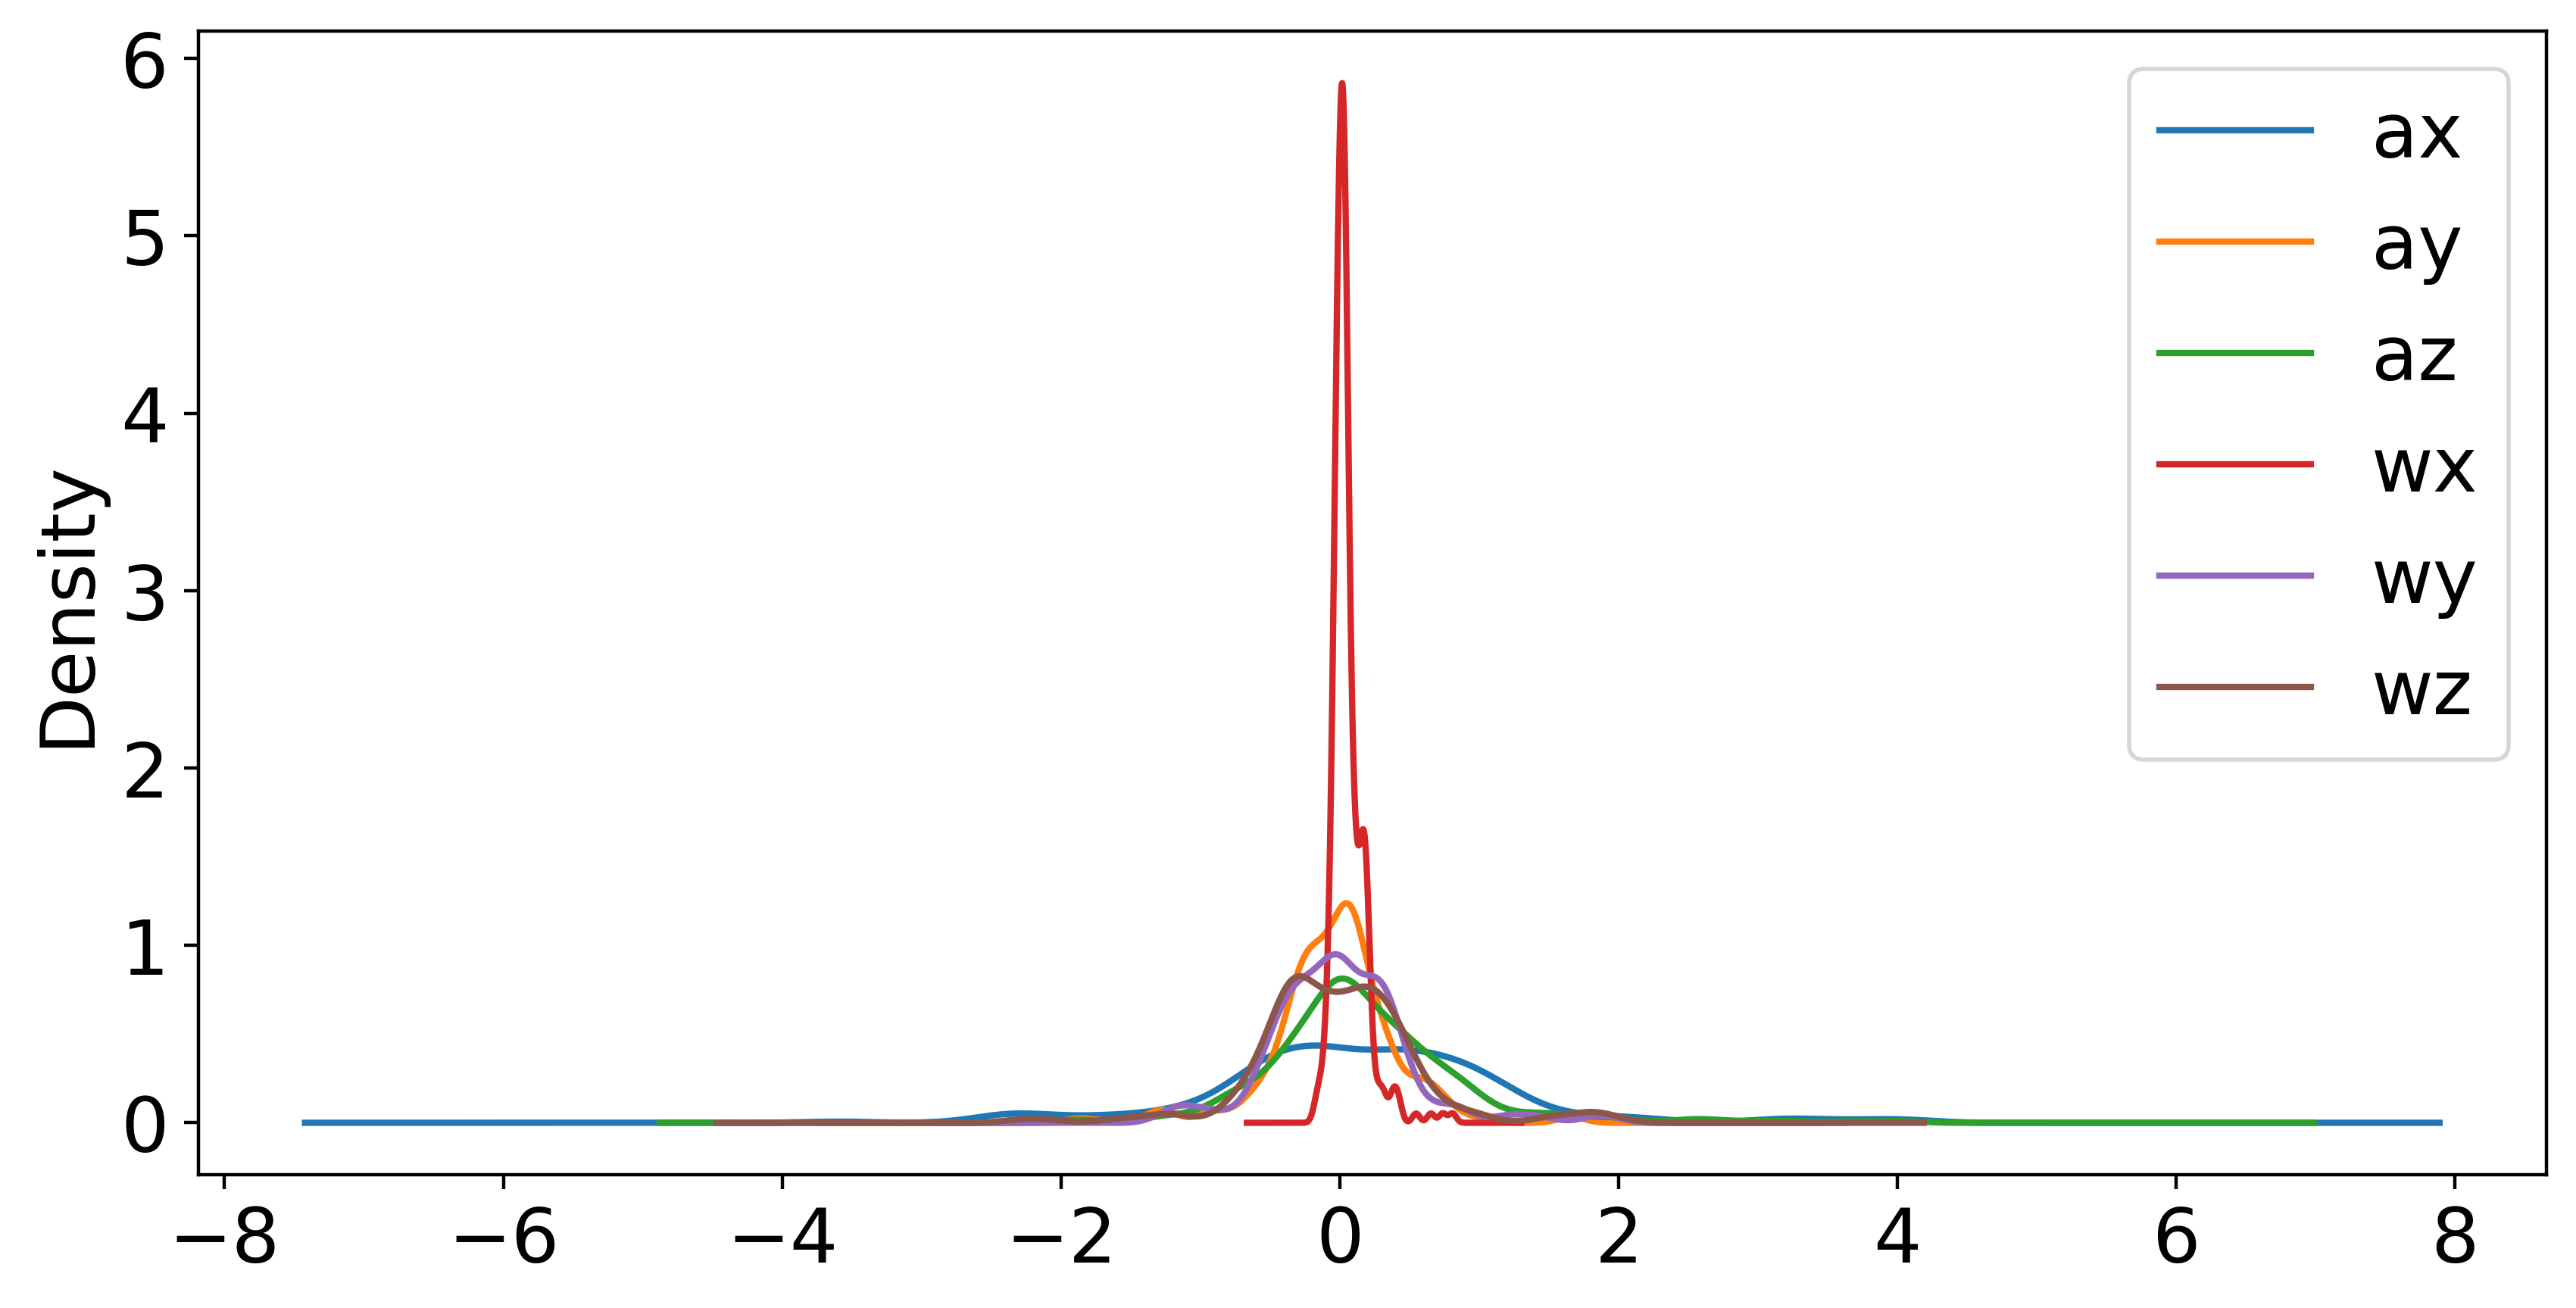

In [ ]:
bike_ag[:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude", kind = 'kde')

In [ ]:
car_ag = car[['ax', 'ay', 'az', 'wx', 'wy', 'wz']]
car_ag

ax      ay      az      wx      wy      wz
0     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
1     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
2     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
3     0.0000  0.0000  0.0000  0.3485 -0.3080  0.1507
4     0.0000  0.0000  0.0000  0.3485 -0.3080  0.1507
...      ...     ...     ...     ...     ...     ...
5675  0.5497 -0.4224  1.1353 -0.1799  0.1910  0.2282
5676  0.5497 -0.4224  1.1353 -0.1799  0.1910  0.2282
5677  0.5497 -0.4224  1.1353 -0.1799  0.1910  0.2282
5678  0.5497 -0.4224  1.1353 -0.1799  0.1910  0.2282
5679  0.5497 -0.4224  1.1353  0.0038  0.1519 -0.1246

[5680 rows x 6 columns]

In [ ]:
car_ag.plot()

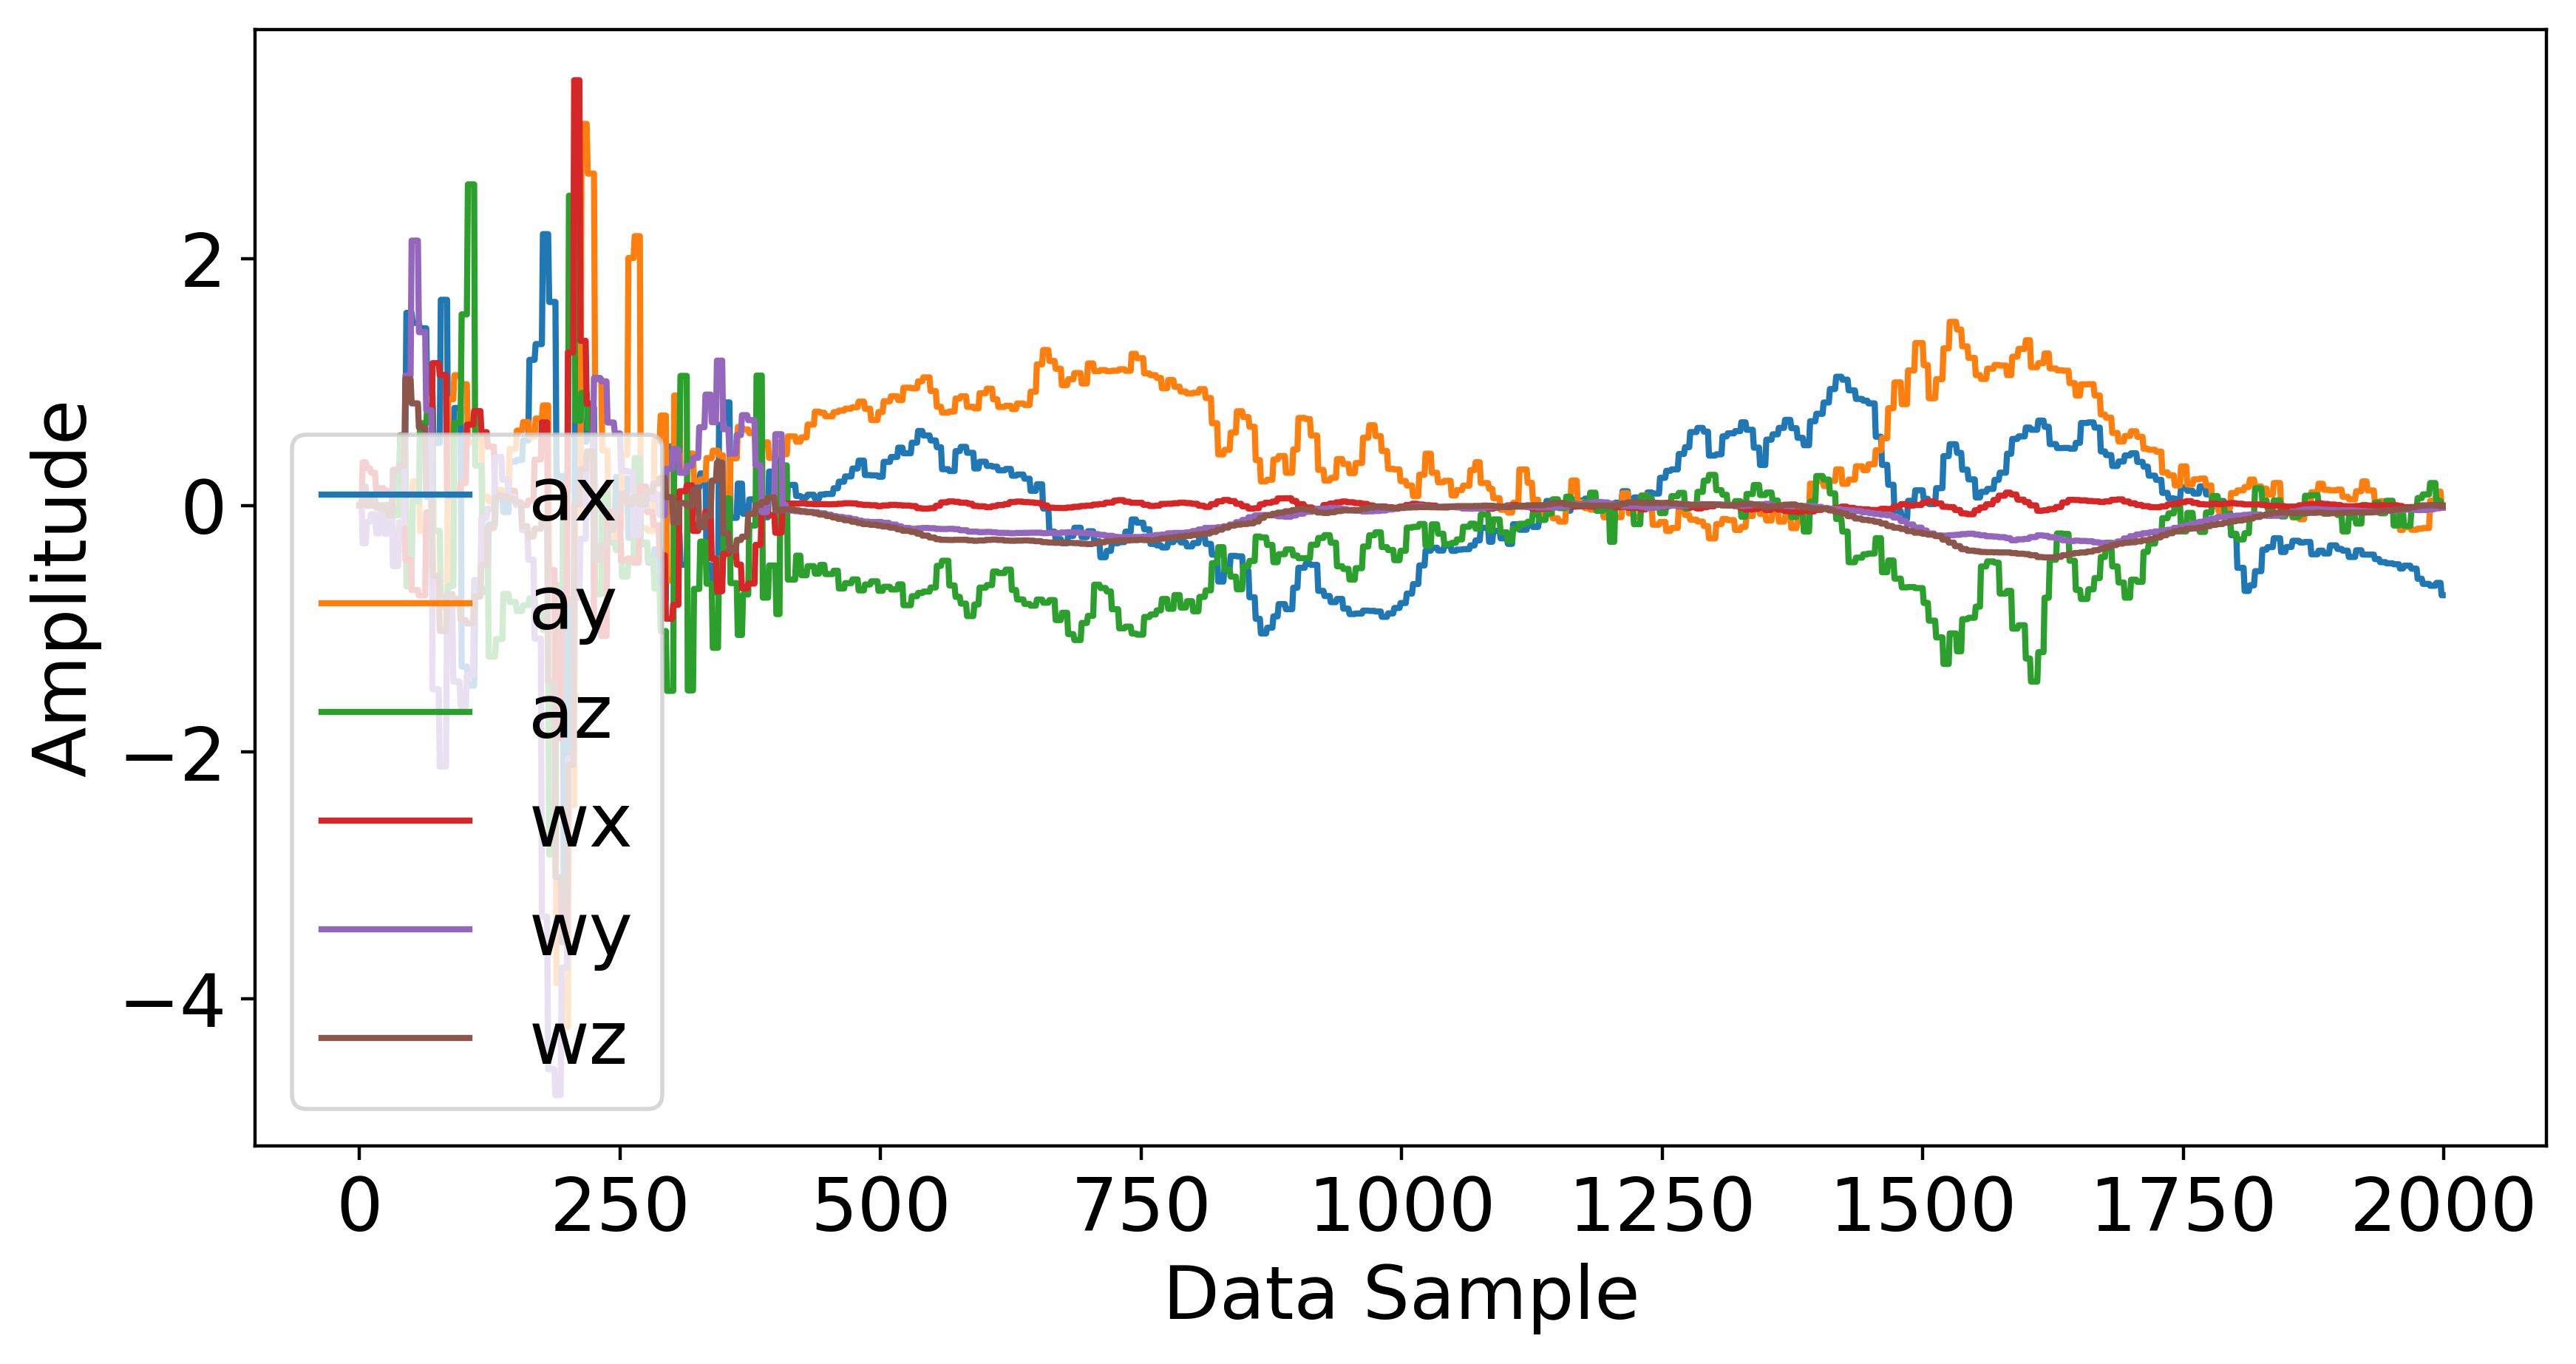

In [ ]:
car_ag[:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude")

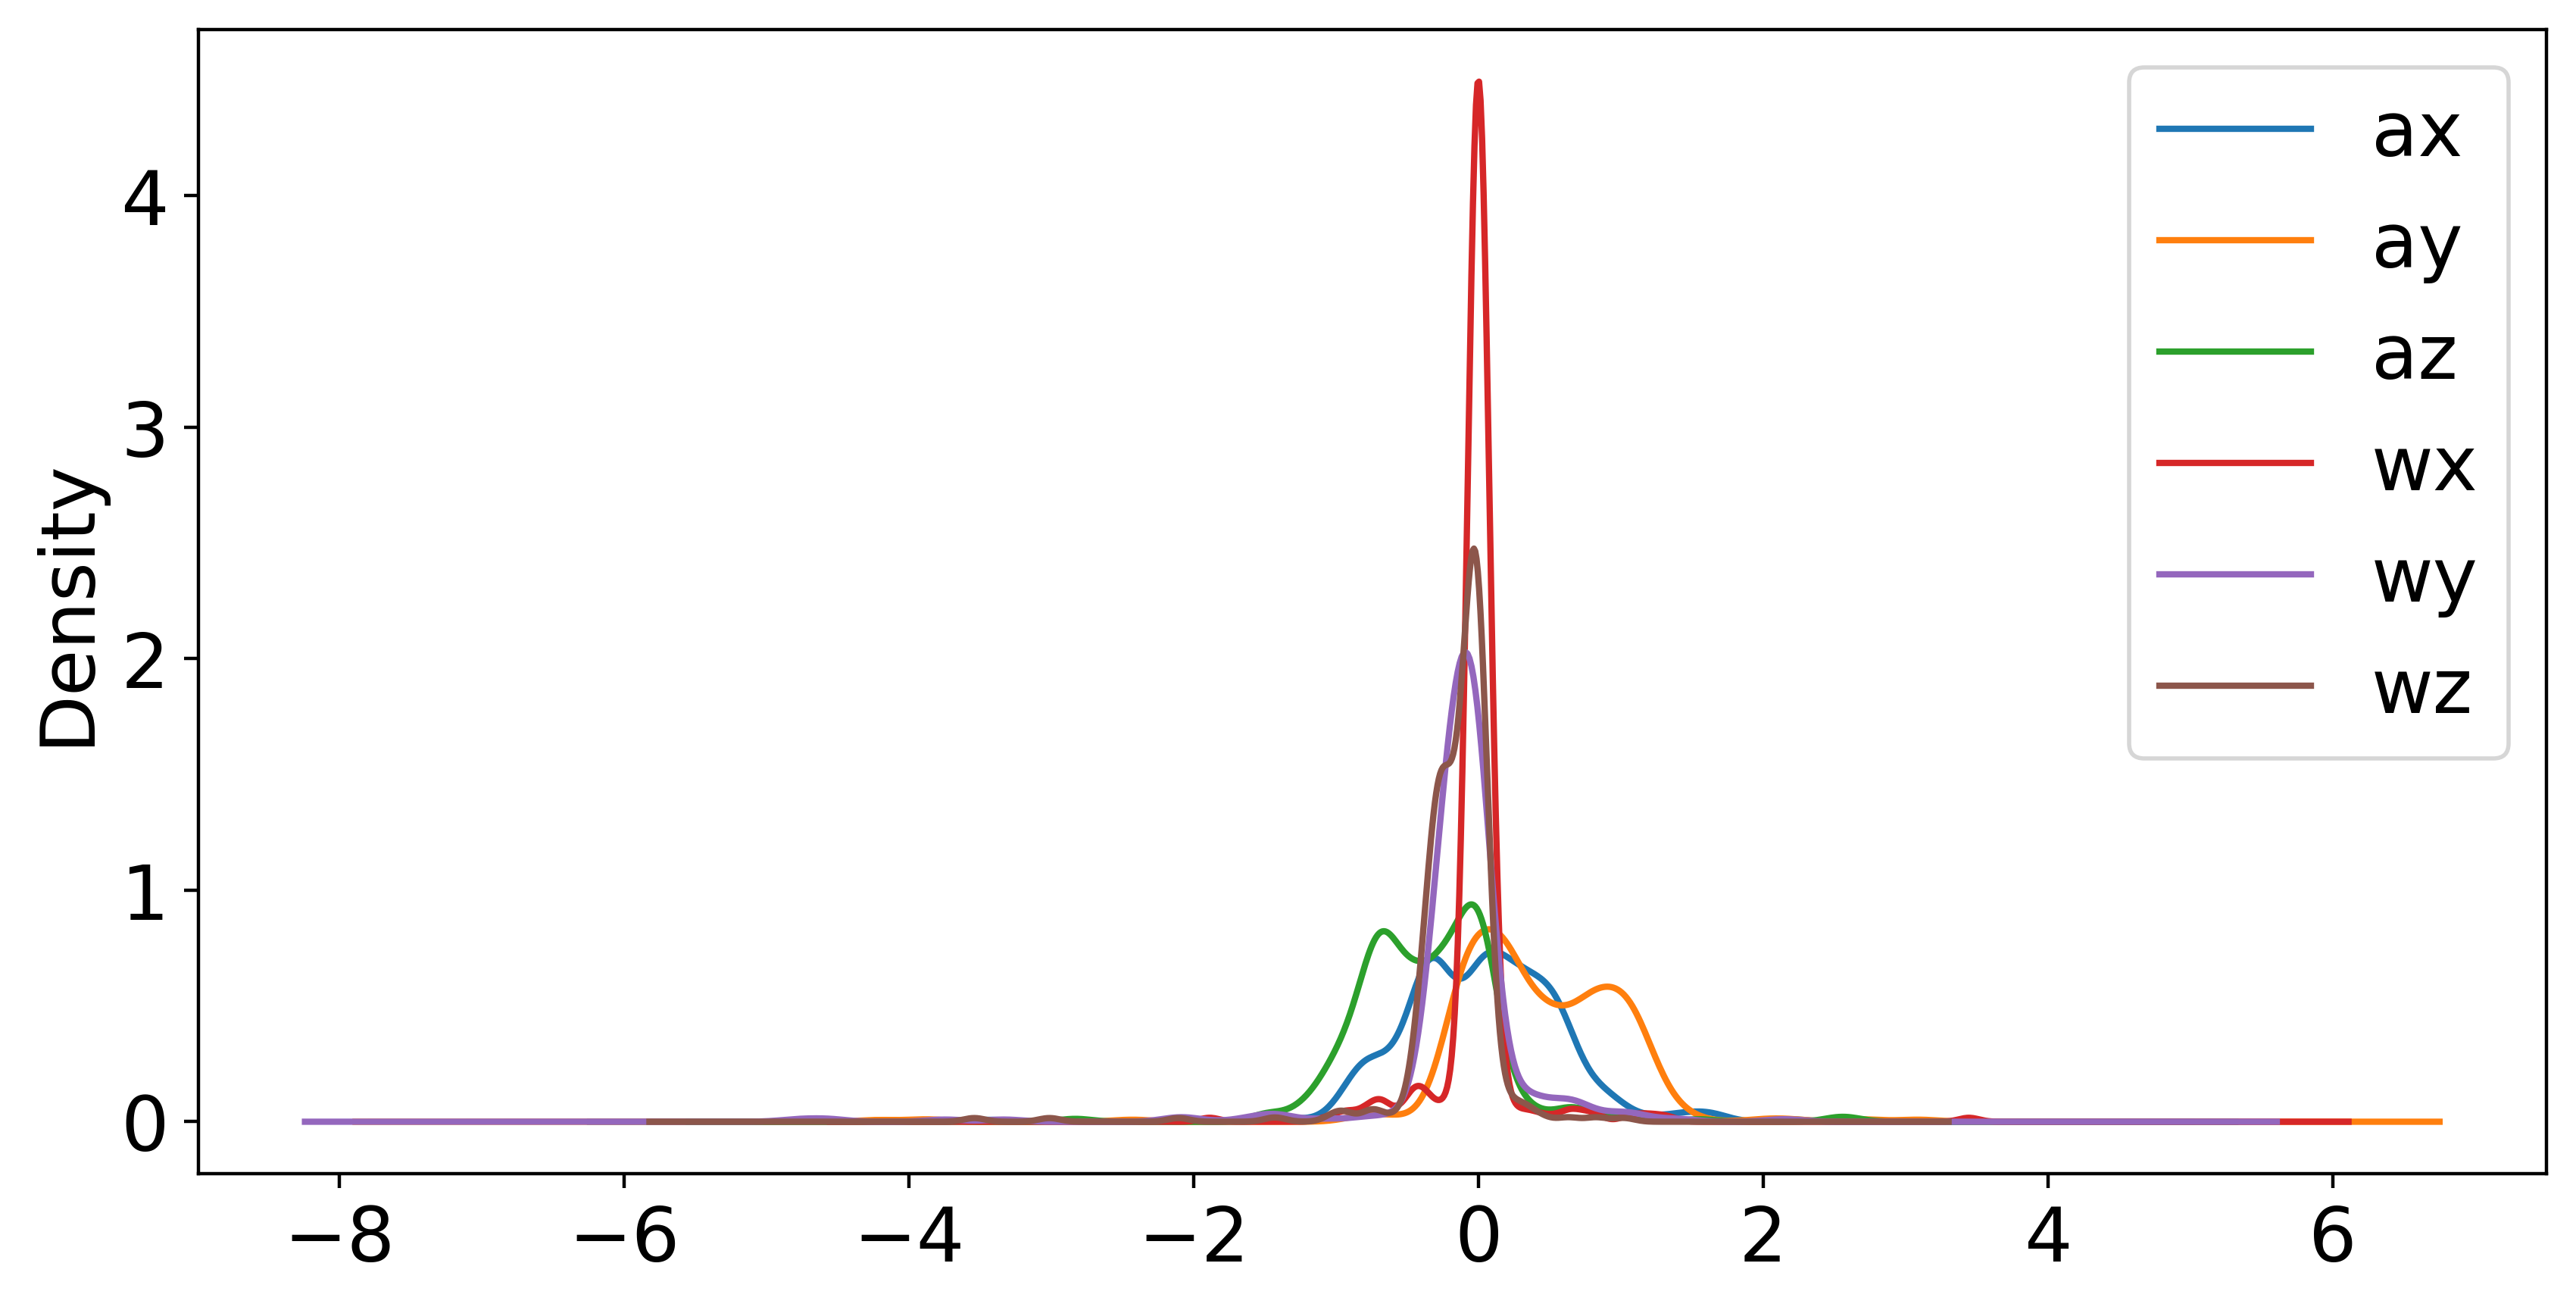

In [ ]:
car_ag[:2000].plot(xlabel = "Data Sample", ylabel = "Amplitude", kind = 'kde')

**Weather Condition**

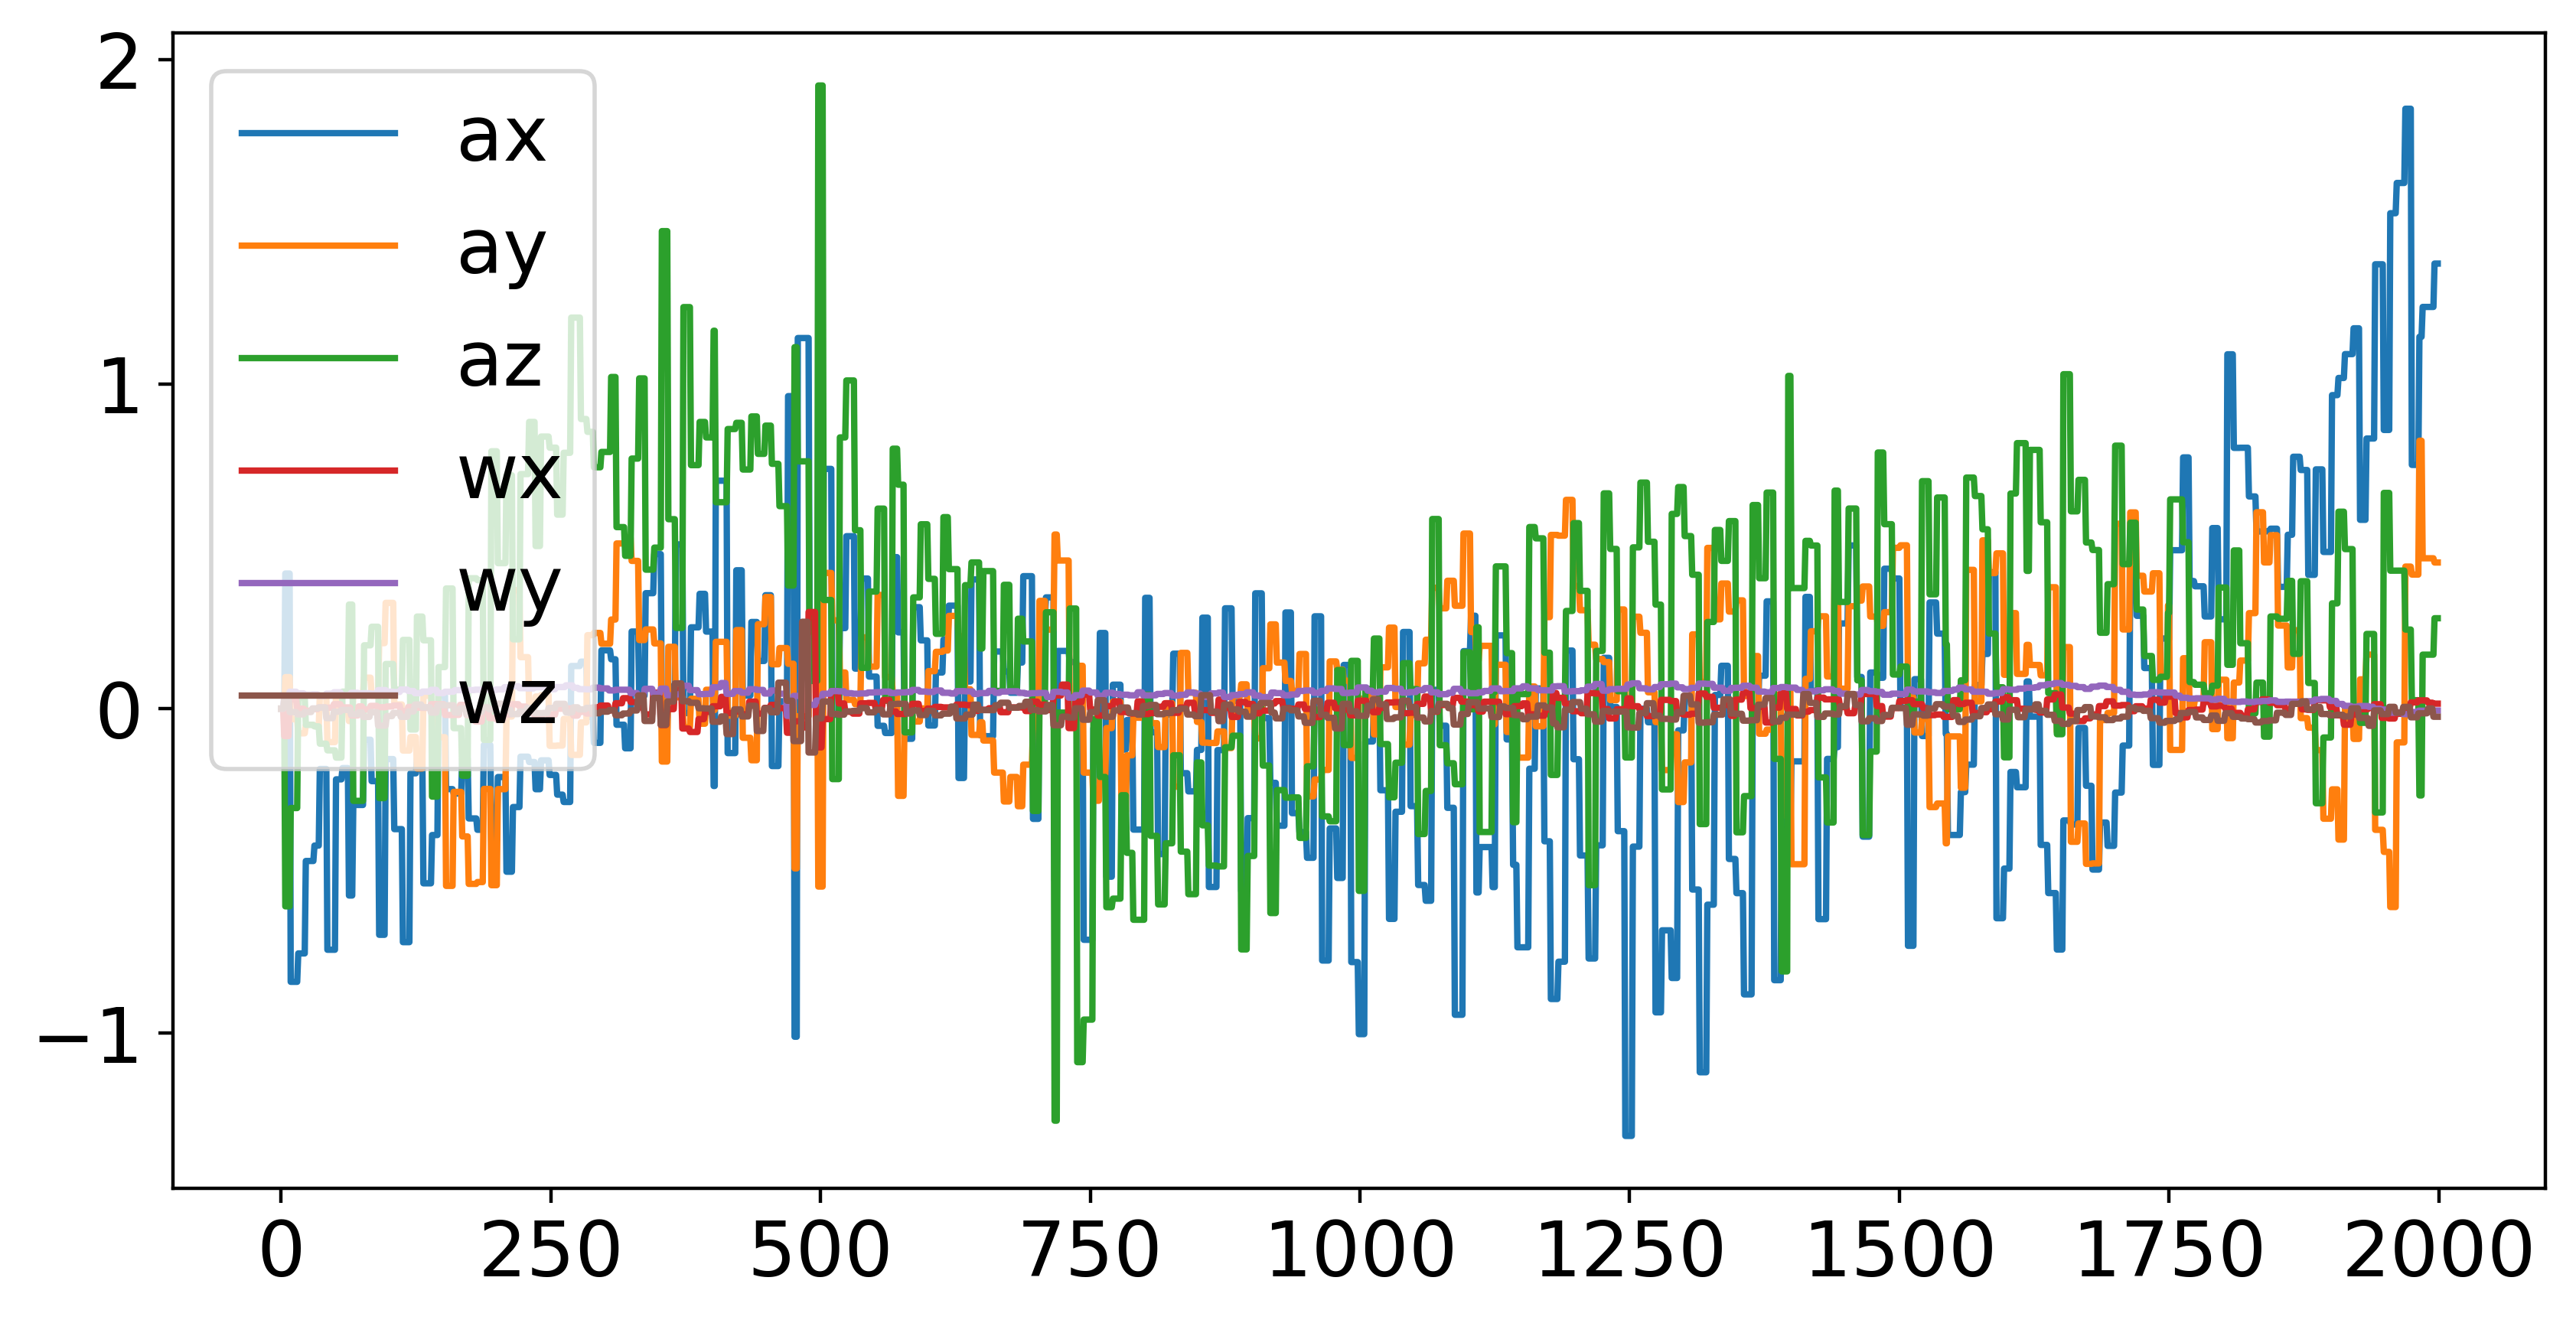

In [ ]:
car_clear_ag[:2000].plot()

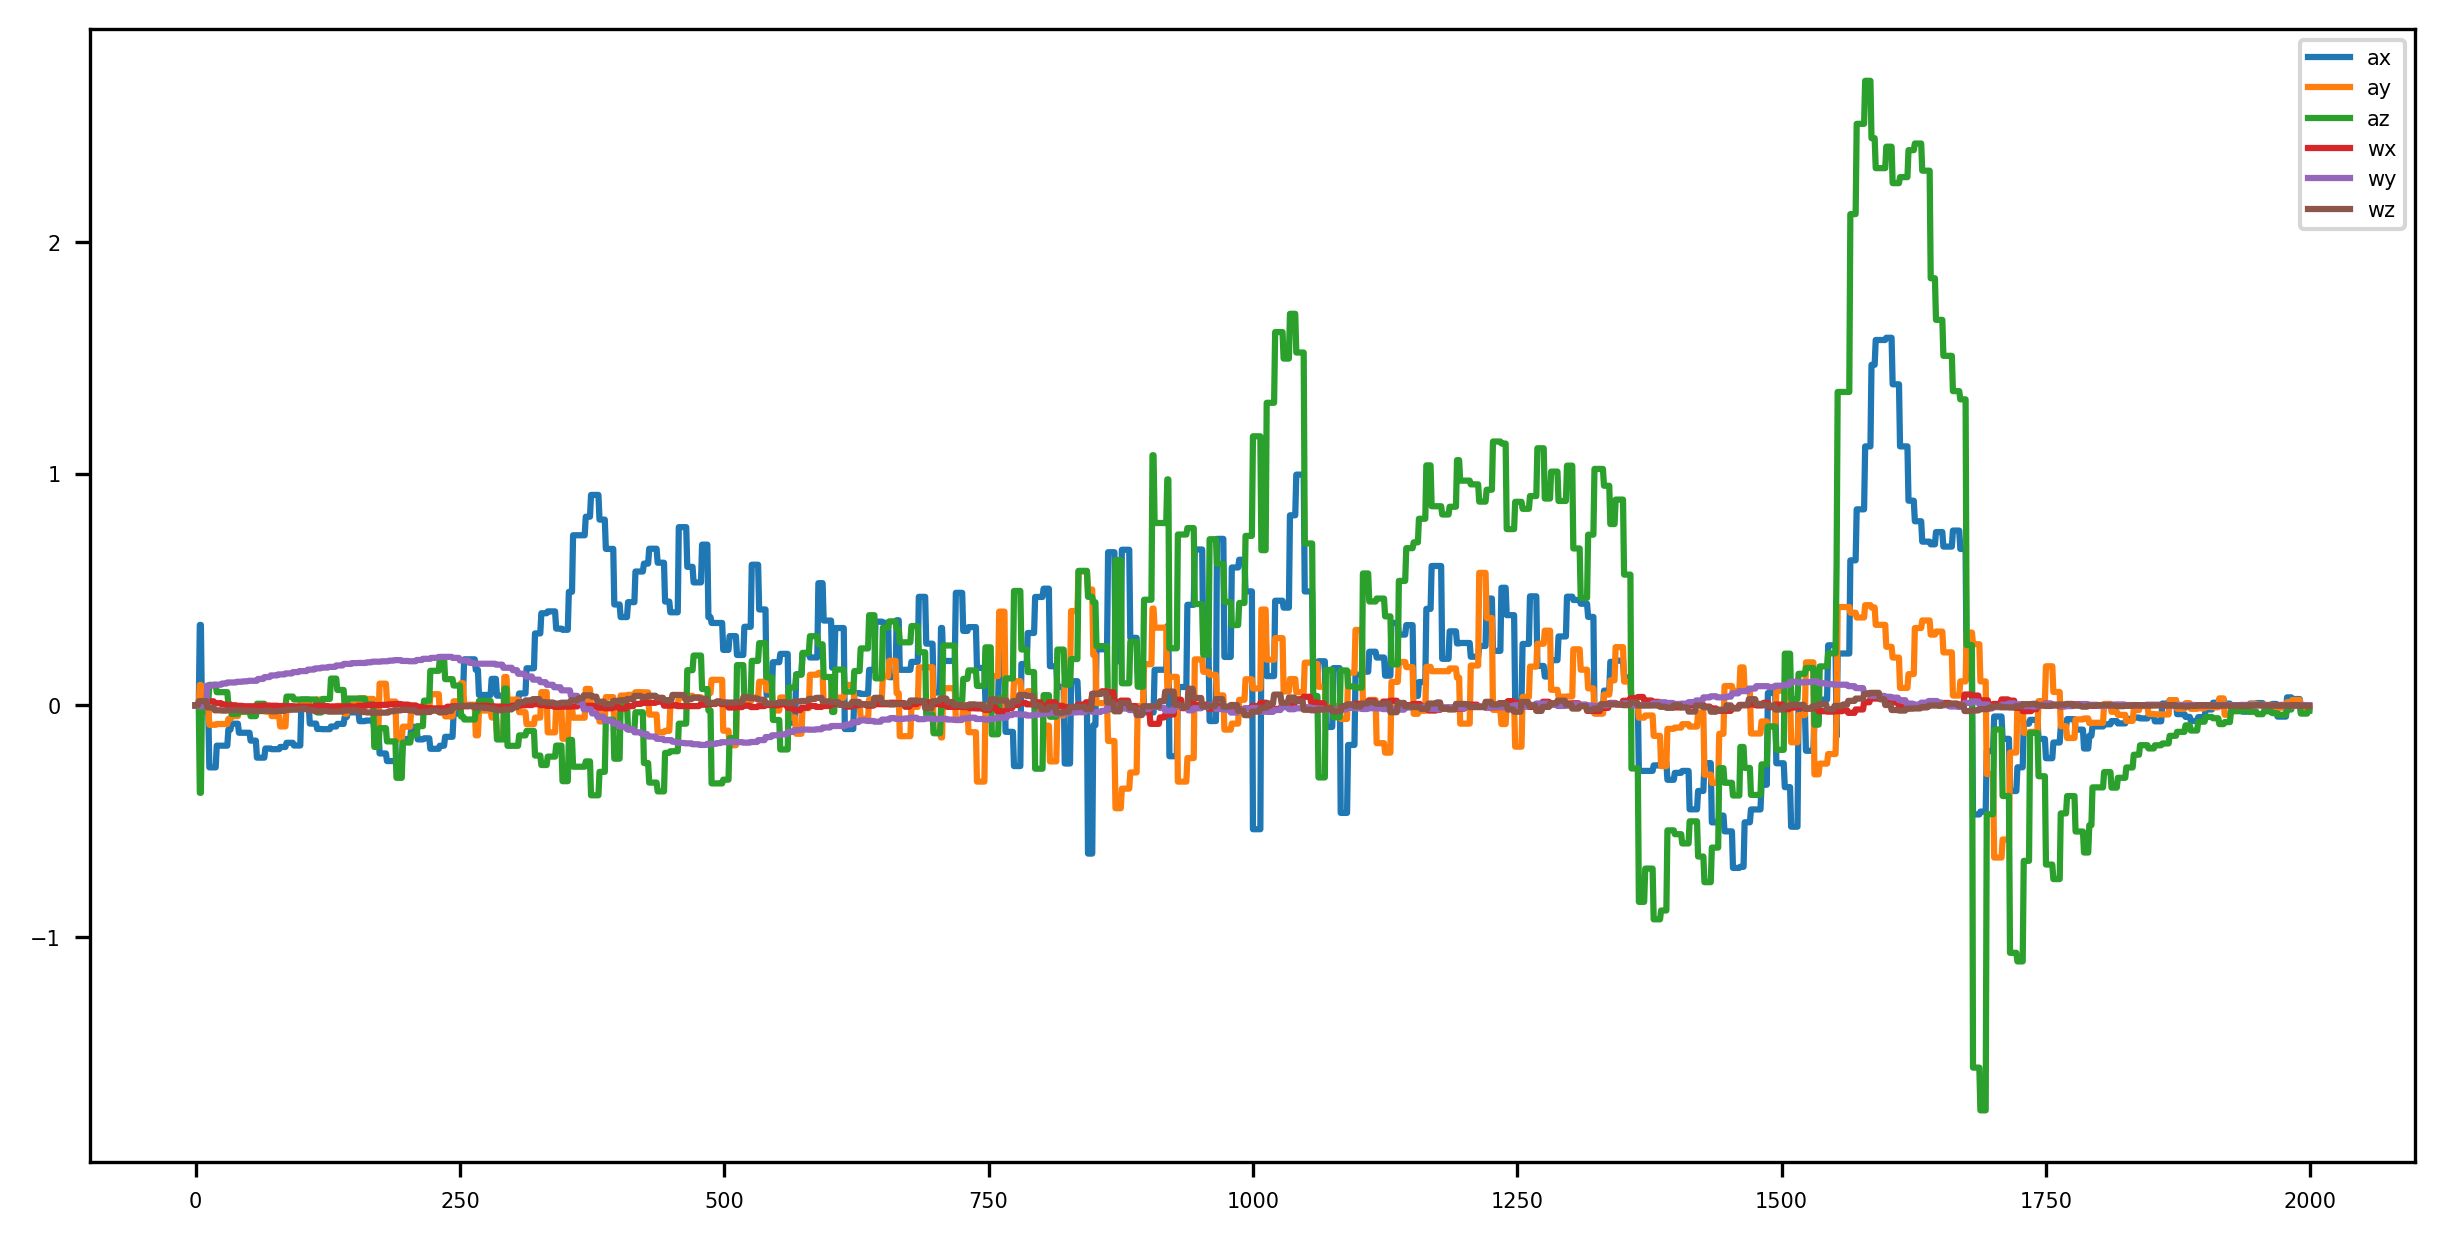

In [ ]:
car_rain_newark_light_ag[:2000].plot()

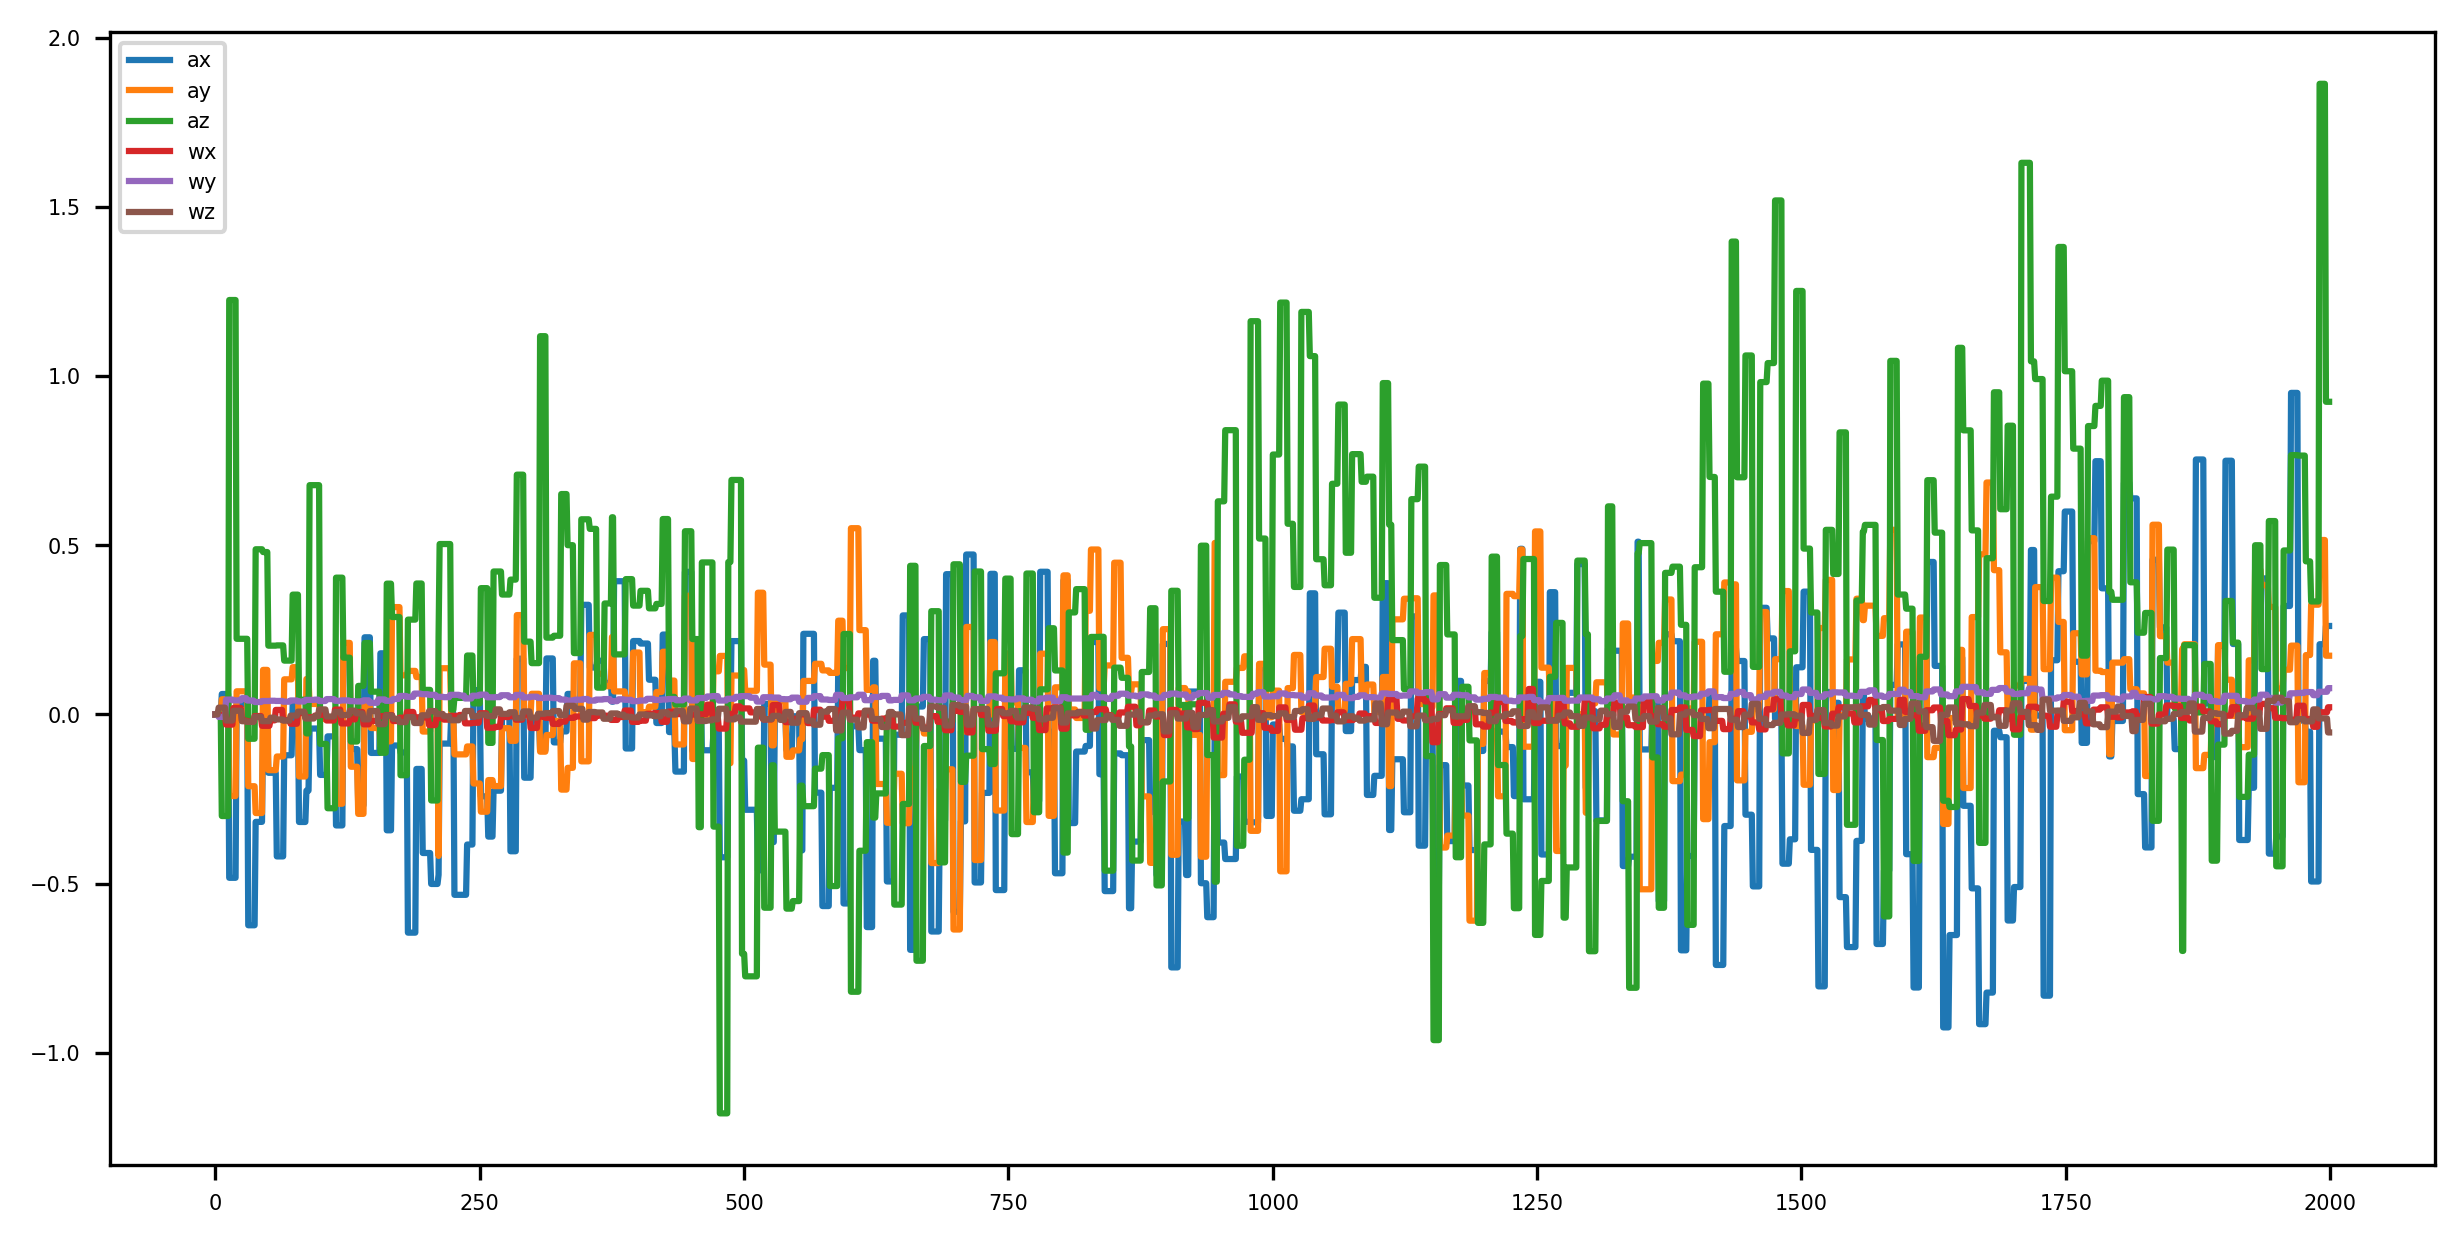

In [ ]:
car_rain_ag[:2000].plot()

# TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


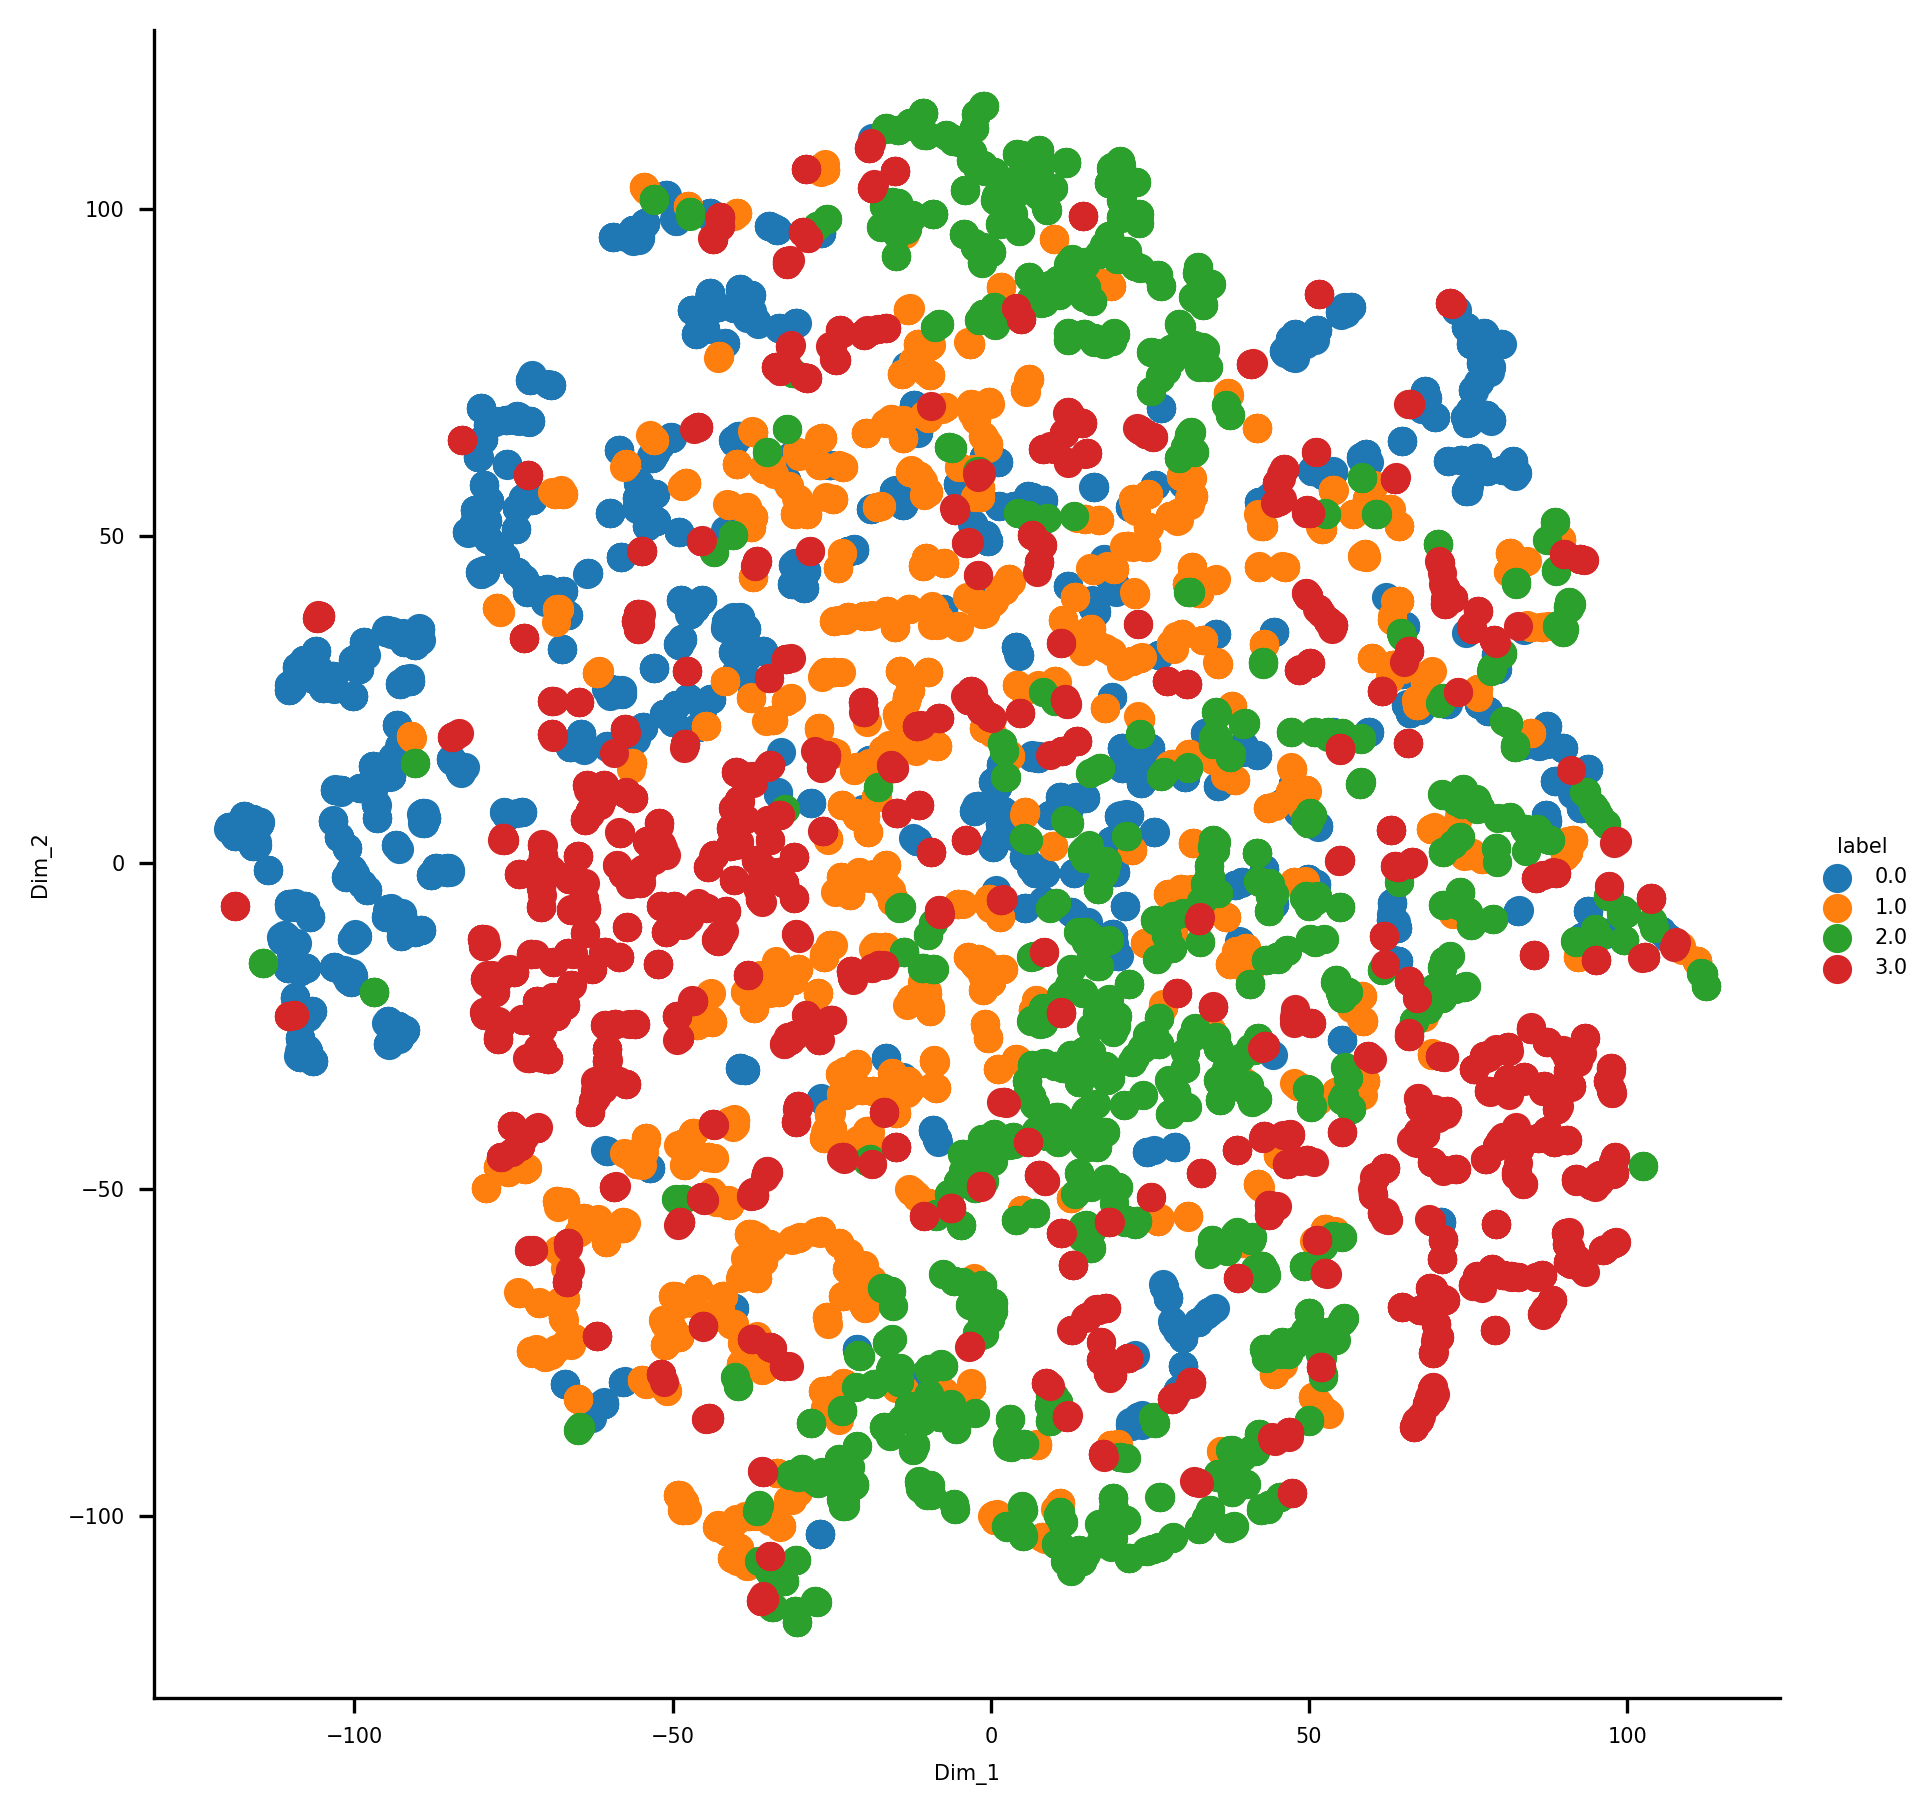

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
# data_1000 = standarized_data[0:1000,:]
# labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the  optimization = 1000

tsne_data = model.fit_transform(X_2)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Y_3)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# PCA

shape of pca_reduced.shape =  (11200, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


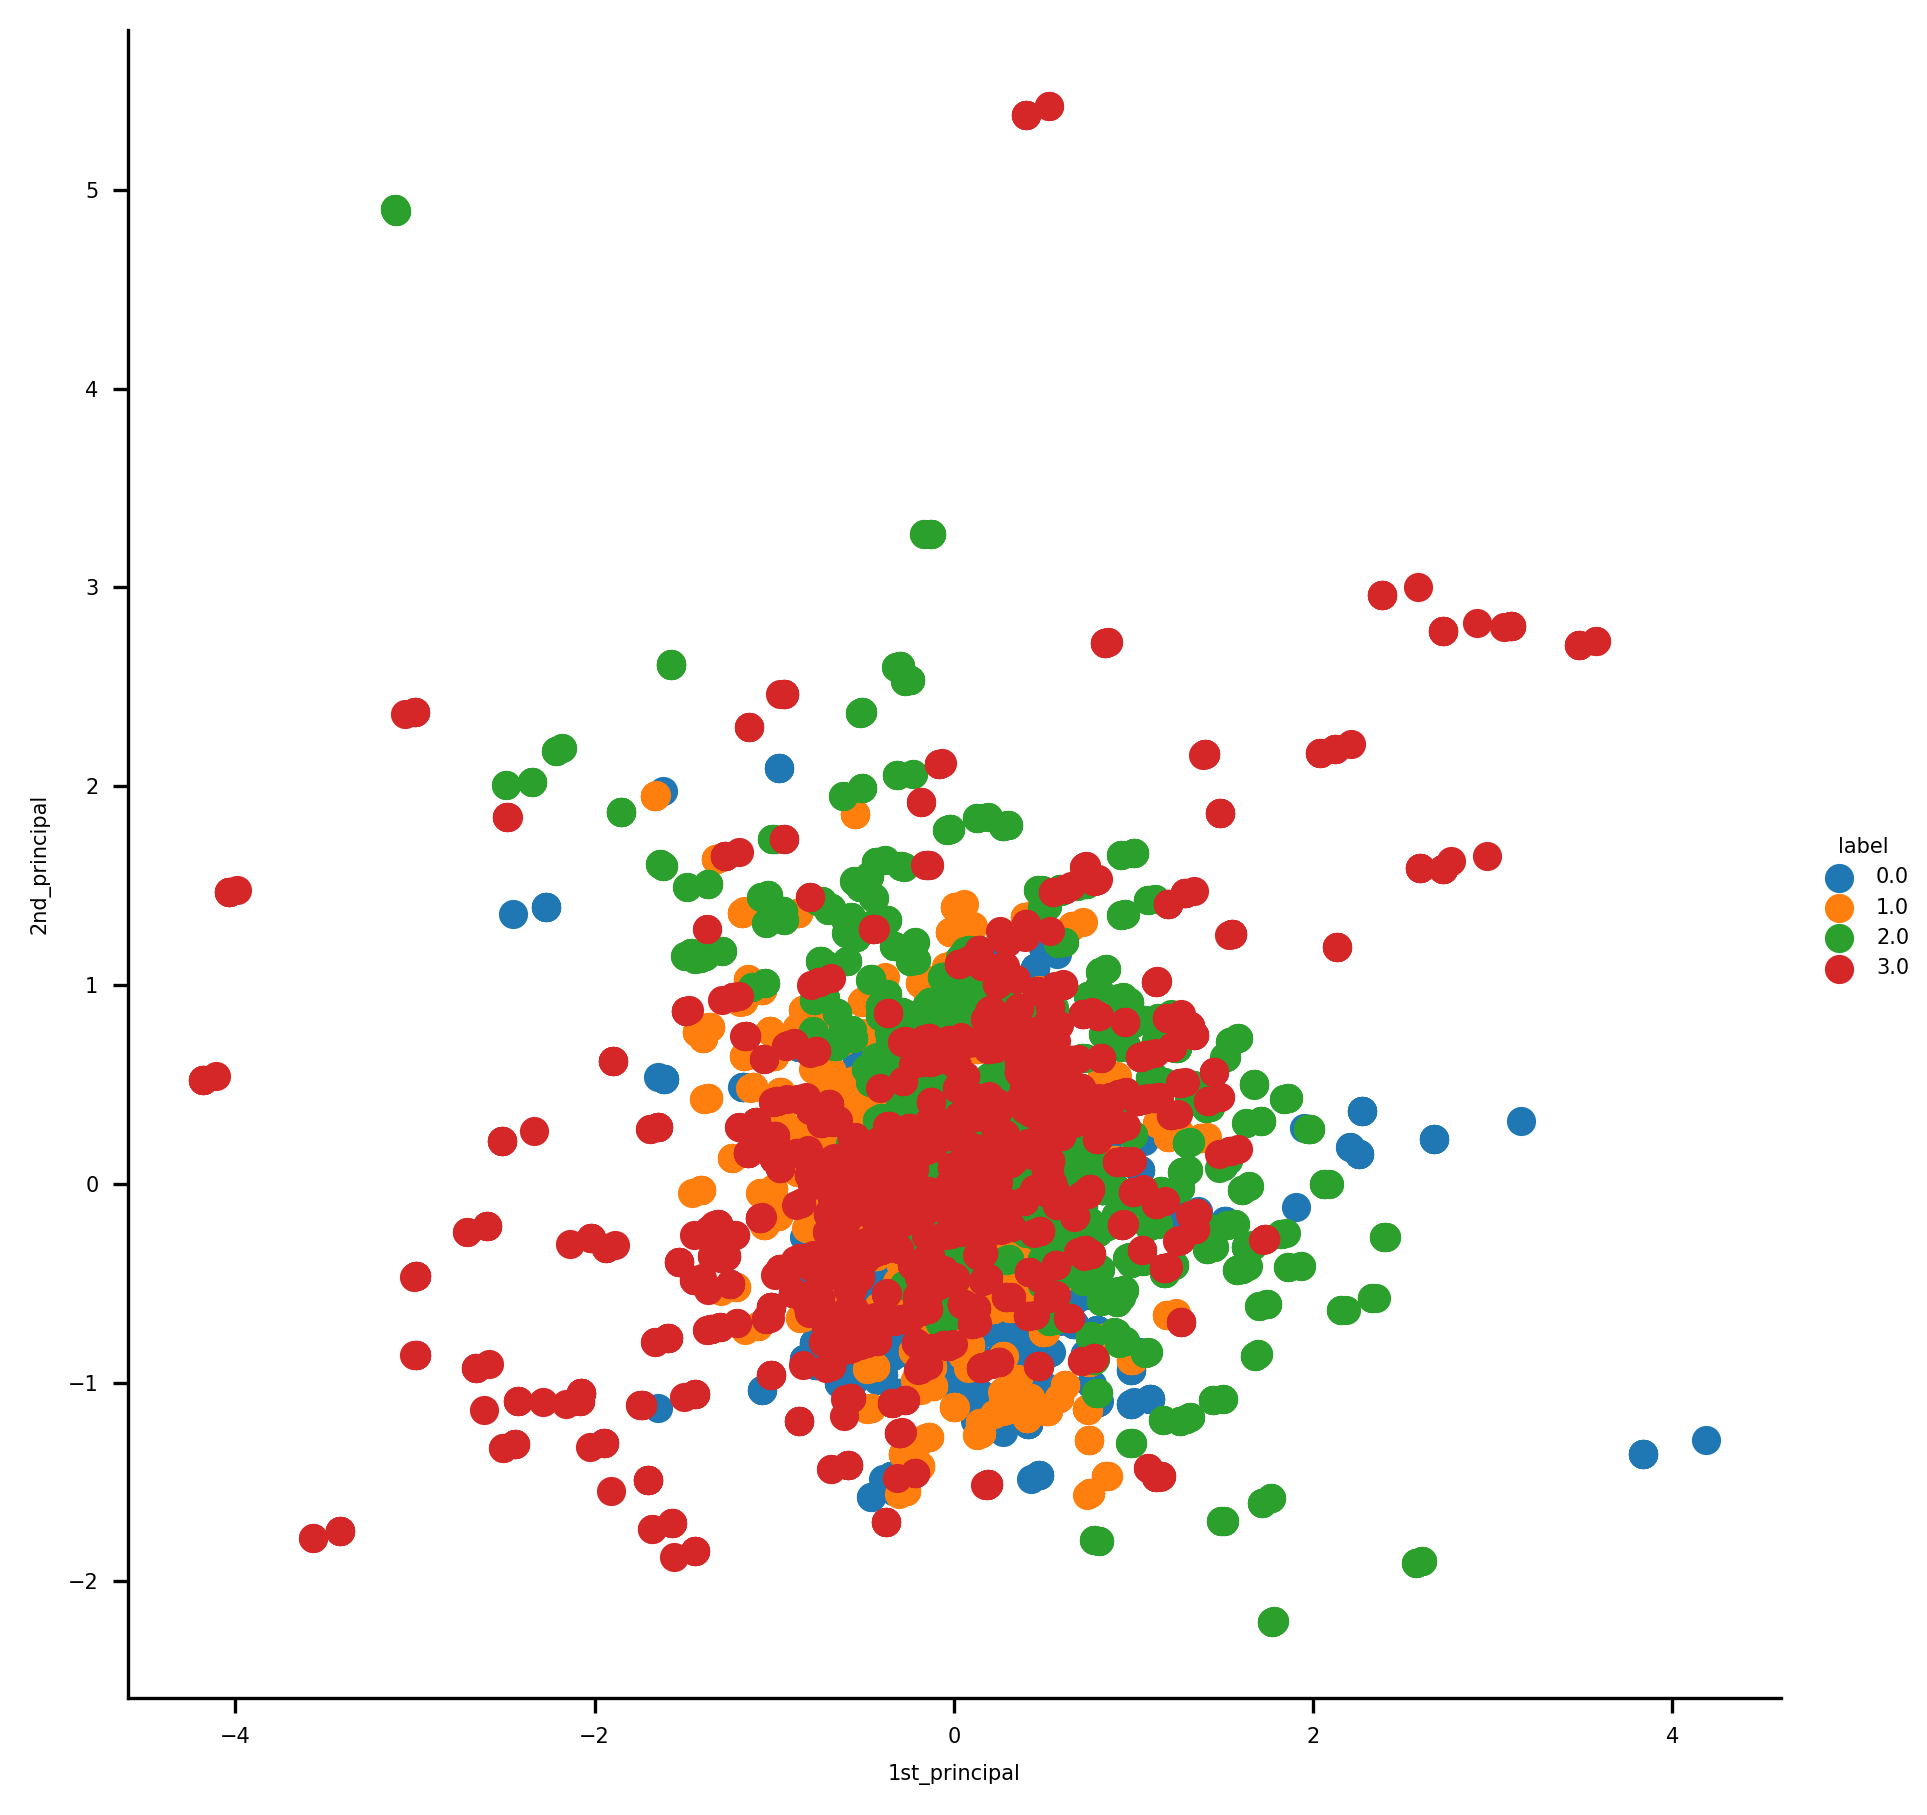

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(X_2)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

pca_data = np.vstack((pca_data.T, Y_3)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = dataset
features = ['AX','AY','AZ','GX','GY','GZ', 'Class']

#X = df[features]
X = dataset

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['Class'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

# Run

# Dataset Preprocesing

**Hyperparameter: FL = File length**

In [ ]:
FL = 2800 # minimum of all files, the more the better. FL=20,000 is better than FL=2,000

car_ag_fl = car_ag[:FL] 
rail_ag_fl = rail_ag[:FL]
bus_ag_fl = bus_ag[:FL]
bike_ag_fl = bike_ag[:FL]

# generate class label
c0 = np.full((FL), 0).reshape(FL, 1)
c1 = np.full((FL), 1).reshape(FL, 1)
c2 = np.full((FL), 2).reshape(FL, 1)
c3 = np.full((FL), 3).reshape(FL, 1)

print(car_ag_fl.shape, rail_ag_fl.shape, bus_ag_fl.shape, bike_ag_fl.shape, c0.shape, c1.shape, c2.shape, c3.shape)

(2800, 6) (2800, 6) (2800, 6) (2800, 6) (2800, 1) (2800, 1) (2800, 1) (2800, 1)


**Test Weather**

In [ ]:
FL = 2800 # minimum of all files, the more the better. FL=20,000 is better than FL=2,000

car_clear_fl = car_clear_ag[:FL] 
car_rain_ag_fl = car_rain_ag[:FL]
car_rain_newark_light_ag_fl = car_rain_newark_light_ag[:FL]
car_ag_fl = car_ag[:FL] 

rail_ag_fl = rail_ag[:FL]
bus_ag_fl = bus_ag[:FL]
bike_ag_fl = bike_ag[:FL]

# generate class label
c0 = np.full((FL*4), 0).reshape(FL*4, 1)
c0 = np.full((FL), 0).reshape(FL, 1)
c1 = np.full((FL), 1).reshape(FL, 1)
c2 = np.full((FL), 2).reshape(FL, 1)
c3 = np.full((FL), 3).reshape(FL, 1)

print(car_clear_fl.shape, car_rain_ag_fl.shape, car_rain_newark_light_ag_fl.shape, c0.shape)

(2800, 6) (2800, 6) (2800, 6) (2800, 1)


**Raw data in dataframe (Just for visualization)**

In [ ]:
X_2 = np.concatenate((np.array(car_ag_fl), np.array(rail_ag_fl), np.array(bus_ag_fl), np.array(bike_ag_fl)), axis=0)
Y_2 = np.concatenate((np.array(c0), np.array(c1), np.array(c2), np.array(c3)),axis=0)

X_2.shape, Y_2.shape

((11200, 6), (11200, 1))

In [ ]:
Y_3 = np.squeeze(Y_2)
Y_3.shape

(11200,)

In [ ]:
dataset = np.hstack((X_2,Y_2))
dataset = np.array(dataset)
dataset = pd.DataFrame(dataset, columns = ['AX','AY','AZ','WX','WY','WZ', 'Class'])
dataset

AX      AY      AZ      WX      WY      WZ  Class
0      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000    0.0
1      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000    0.0
2      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000    0.0
3      0.0000  0.0000  0.0000  0.3485 -0.3080  0.1507    0.0
4      0.0000  0.0000  0.0000  0.3485 -0.3080  0.1507    0.0
...       ...     ...     ...     ...     ...     ...    ...
11195 -1.1163 -0.5583 -0.0027  0.0297  0.1909  0.8564    3.0
11196 -1.1163 -0.5583 -0.0027 -0.0047  0.4644  1.0474    3.0
11197 -1.1163 -0.5583 -0.0027 -0.0047  0.4644  1.0474    3.0
11198 -1.1163 -0.5583 -0.0027 -0.0047  0.4644  1.0474    3.0
11199 -1.1163 -0.5583 -0.0027 -0.0047  0.4644  1.0474    3.0

[11200 rows x 7 columns]

In [ ]:
import seaborn as sns

sns_plt = sns.pairplot(dataset, hue='Class', kind="kde")
sns_plt.savefig("kde.png", dpi=600)

In [ ]:
sns.pairplot(dataset, kind="kde")

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = dataset
features = ['AX','AY','AZ','GX','GY','GZ', 'Class']

pca = PCA(n_components=2)
components = pca.fit_transform(X_2)

fig = px.scatter(components, x=0, y=1, color=df['Class'])
fig.show( )
# https://plotly.com/python/pca-visualization/

In [ ]:
import plotly.express as px

df = dataset
features = ['AX','AY','AZ','WX','WY','WZ', 'Class']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="Class"
)
fig.update_traces(diagonal_visible=True)
fig.show()

# Way 1: Sliding window segmentation

In [ ]:
def segment_dataset(data_class, seg = 200):
  car_np = data_class.to_numpy()
  car_seg = []
  for i in range(car_np.shape[0] - seg):
    car_seg.append(car_np[i:i+seg])
  car_seg = np.array(car_seg) 
  return car_seg


car_seg = segment_dataset(car_ag_fl)
rail_seg = segment_dataset(rail_ag_fl)
bus_seg = segment_dataset(bus_ag_fl)
bike_seg = segment_dataset(bike_ag_fl)

length = car_seg.shape[0]
# generate class label
c0 = np.full((length), 0)
c1 = np.full((length), 1)
c2 = np.full((length), 2)
c3 = np.full((length), 3)

print(car_seg.shape, c0.shape)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 

X = np.concatenate((car_seg, rail_seg, bus_seg, bike_seg), axis=0)

Y = np.concatenate((c0, c1, c2, c3), axis = None)
Y = to_categorical(Y)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
trainX.shape, testX.shape, trainY.shape, testY.shape

(2600, 200, 6) (2600,)


((8320, 200, 6), (2080, 200, 6), (8320, 4), (2080, 4))

# Test Weather

In [ ]:
def segment_dataset(data_class, seg = 200):
  car_np = data_class.to_numpy()
  car_seg = []
  for i in range(car_np.shape[0] - seg):
    car_seg.append(car_np[i:i+seg])
  car_seg = np.array(car_seg) 
  return car_seg




car_clear_seg = segment_dataset(car_clear_fl)
car_rain_seg = segment_dataset(car_rain_ag_fl)
car_rain_newark_light_seg = segment_dataset(car_rain_newark_light_ag_fl)

car_seg = segment_dataset(car_ag_fl)
rail_seg = segment_dataset(rail_ag_fl)
bus_seg = segment_dataset(bus_ag_fl)
bike_seg = segment_dataset(bike_ag_fl)

length = car_seg.shape[0]
# generate class label
c0 = np.full((length*4), 0)
c1 = np.full((length), 1)
c2 = np.full((length), 2)
c3 = np.full((length), 3)

print(car_seg.shape, c1.shape)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 

X = np.concatenate((car_clear_seg, car_rain_seg, car_rain_newark_light_seg, car_seg, rail_seg, bus_seg, bike_seg), axis=0)

Y = np.concatenate((c0, c1, c2, c3), axis = None)
Y = to_categorical(Y)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
trainX.shape, testX.shape, trainY.shape, testY.shape

(2600, 200, 6) (2600,)


((14560, 200, 6), (3640, 200, 6), (14560, 4), (3640, 4))

# Way 2: Raw data

In [ ]:
Split = 1500 #Most people use 80/20 split in practice

trainX_list = [car_ag_fl[:Split], rail_ag_fl[:Split], bus_ag_fl[:Split], bike_ag_fl[:Split]]
testX_list = [car_ag_fl[Split:FL], rail_ag_fl[Split:FL], bus_ag_fl[Split:FL], bike_ag_fl[Split:FL]]

trainX = pd.concat(trainX_list,ignore_index=True)
testX = pd.concat(testX_list,ignore_index=True)

trainY = np.concatenate((c0[:Split], c1[:Split], c2[:Split], c3[:Split]), axis = None)
testY = np.concatenate((c0[Split:FL], c1[Split:FL], c2[Split:FL], c3[Split:FL]), axis = None)

trainX.shape, testX.shape, trainY.shape, testY.shape

((6000, 6), (5200, 6), (6000,), (5200,))

In [ ]:
trainX[100:105]

ax      ay      az      wx      wy      wz
100 -1.3065  0.9809  1.5471  0.1808 -1.6276 -0.9305
101 -1.3065  0.9809  1.5471  0.1808 -1.6276 -0.9305
102 -1.3065  0.9809  1.5471  0.1808 -1.6276 -0.9305
103 -1.3065  0.9809  1.5471  0.6538 -1.3715 -0.9566
104 -1.4598  0.5110  2.6004  0.6538 -1.3715 -0.9566

In [ ]:
trainX_np = trainX.to_numpy()
trainX_np.shape

(6000, 6)

In [ ]:
trainX_np = trainX.to_numpy()
#trainX_np = trainX_np.reshape((trainX_np.shape[0]//10, trainX_np.shape[1], 10))
trainX_np = trainX_np.reshape((trainX_np.shape[0]//1, trainX_np.shape[1], 1))

trainX_np.shape

(6000, 6, 1)

In [ ]:
trainX_np[100:103]

# Way 3: Segment the timeseries

In [ ]:
seg = 10
trainX_np = trainX.to_numpy()
trainX_np_10 = trainX_np.reshape((trainX_np.shape[0]//seg, seg, trainX_np.shape[1]))
#trainX_np = trainX_np.reshape((trainX_np.shape[0]//1, trainX_np.shape[1], 1))

trainX_np_10.shape

(600, 10, 6)

In [ ]:
seg = 10
testX_np = testX.to_numpy()
testX_np_10 = testX_np.reshape((testX_np.shape[0]//seg, seg, testX_np.shape[1]))
#trainX_np = trainX_np.reshape((trainX_np.shape[0]//1, trainX_np.shape[1], 1))

testX_np_10.shape

(520, 10, 6)

In [ ]:
trainX_np_10[100]

array([[-0.7915,  0.1966, -0.3682, -0.0105, -0.0217, -0.0189],
       [-0.7915,  0.1966, -0.3682, -0.0105, -0.0217, -0.0189],
       [-0.7915,  0.1966, -0.3682, -0.0105, -0.0217, -0.0189],
       [-0.7915,  0.1966, -0.3682, -0.0105, -0.0217, -0.0189],
       [-0.7915,  0.1966, -0.3682,  0.0027, -0.0147, -0.0173],
       [-0.715 ,  0.1607, -0.1804,  0.0027, -0.0147, -0.0173],
       [-0.715 ,  0.1607, -0.1804,  0.0027, -0.0147, -0.0173],
       [-0.715 ,  0.1607, -0.1804,  0.0027, -0.0147, -0.0173],
       [-0.715 ,  0.1607, -0.1804,  0.0027, -0.0147, -0.0173],
       [-0.715 ,  0.1607, -0.1804,  0.0027, -0.0147, -0.0173]])

In [ ]:
trainY_10 = []
for i in range(trainY.shape[0]):
  if i%10 == 0:
    trainY_10.append(trainY[i])
trainY_10 = np.array(trainY_10)
trainY_10.shape

(600, 4)

In [ ]:
testY_10 = []
for i in range(testY.shape[0]):
  if i%10 == 0:
    testY_10.append(testY[i])
testY_10 = np.array(testY_10)
testY_10.shape

(520, 4)

In [ ]:
trainY[3000], trainY_10[300]

(array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32))

# **Run**

**Hyperparameter:**

In [ ]:
num_classes = 4 # depends on the number of classes
#input_shape = (trainX_np.shape[1], trainX_np.shape[2]) # depends on the dimension of the dataset
input_shape = (trainX.shape[1], trainX.shape[2]) # depends on the dimension of the dataset

print(num_classes, input_shape)

4 (200, 6)


# Model 1

In [ ]:
def make_model(input_shape):
  #input_layer = keras.layers.Input(input_shape)
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  dense1 = keras.layers.Dense(512, activation="relu")(gap) 

  output_layer = keras.layers.Dense(num_classes, activation="softmax")(dense1)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=input_shape)
keras.utils.plot_model(model, show_shapes=True)

# Model 2

In [ ]:
def make_model(input_shape):
  #input_layer = keras.layers.Input(input_shape)
  
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=64, kernel_size=9, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv2 = keras.layers.Conv1D(filters=64, kernel_size=9, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=9, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  flat = Flatten() (gap)

  dense1 = Dense(1024, activation='relu') (flat)
  drop1 = Dropout(0.3) (dense1)

  dense2 = Dense(256, activation='relu') (drop1)
  drop2 = Dropout(0.3) (dense2)

  dense3 = Dense(64, activation='relu') (drop2)
  drop3 = Dropout(0.3) (dense3)

  output_layer = keras.layers.Dense(num_classes, activation="softmax")(dense3)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)

#input_shape = (100, 6)
#num_classes = 4
model = make_model(input_shape=input_shape)
print(input_shape)
#keras.utils.plot_model(model, show_shapes=True)

(200, 6)


# Model 3

In [ ]:
def make_model(input_shape):
  #input_layer = keras.layers.Input(input_shape)
  
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=64, kernel_size=9, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = MaxPooling1D(pool_size=(2)) (conv1)

  conv2 = keras.layers.Conv1D(filters=64, kernel_size=9, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)
  conv2 = MaxPooling1D(pool_size=(2)) (conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=9, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = MaxPooling1D(pool_size=(2)) (conv3)

  connect1 = concatenate([conv1, conv2, conv3], axis=1)


  gap = keras.layers.GlobalAveragePooling1D()(connect1)

  flat = Flatten() (gap)

  dense1 = Dense(1024, activation='relu') (flat)
  drop1 = Dropout(0.5) (dense1)

  dense2 = Dense(256, activation='relu') (drop1)
  drop2 = Dropout(0.5) (dense2)

  dense3 = Dense(64, activation='relu') (drop2)
  drop3 = Dropout(0.5) (dense3)

  output_layer = keras.layers.Dense(num_classes, activation="softmax")(dense3)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)

#input_shape = (100, 6)
#num_classes = 4
model = make_model(input_shape=input_shape)
print(input_shape)
#keras.utils.plot_model(model, show_shapes=True)

(200, 6)


In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())

**Hyperparameter**

In [ ]:
epochs = 10 # range: 10-1000 
batch_size = 64 # 1, 2, 4, 8, ...., up to length of dataset

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_win_200.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
)
history = model.fit(
    trainX,
    trainY,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split = 0.2,
    verbose=1,
    shuffle = True
)

Epoch 1/10
182/182 [==============================] - 23s 111ms/step - loss: 0.2394 - accuracy: 0.9127 - val_loss: 0.1472 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 20s 110ms/step - loss: 0.0300 - accuracy: 0.9915 - val_loss: 0.0097 - val_accuracy: 0.9952 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 20s 111ms/step - loss: 0.0272 - accuracy: 0.9926 - val_loss: 0.0019 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 20s 111ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 2.4751e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 20s 111ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 1.9291e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 20s 111ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0021 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
182/182 [========================

In [ ]:
#model = keras.models.load_model("best_model.h5")

#test_loss, test_acc = model.evaluate(testX, testY)
test_loss, test_acc = model.evaluate(testX, testY)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

114/114 [==============================] - 2s 14ms/step - loss: 2.2169e-05 - accuracy: 1.0000
Test accuracy 1.0
Test loss 2.216903340013232e-05


**Load Saved Model**

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/Shareddrives/Vehicle Recognition - Sensor/Code/model weights/best_model2_100.h5')
score = model_loaded.evaluate(testX, testY, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

102/102 [==============================] - 3s 20ms/step - loss: 5.9919e-05 - accuracy: 1.0000
Test loss: 5.991934085614048e-05
Test accuracy: 1.0


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

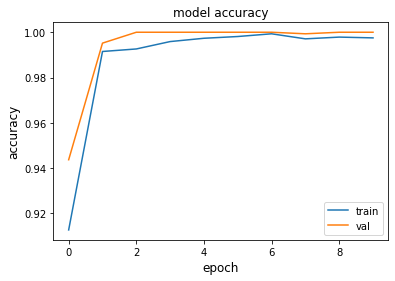

In [ ]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

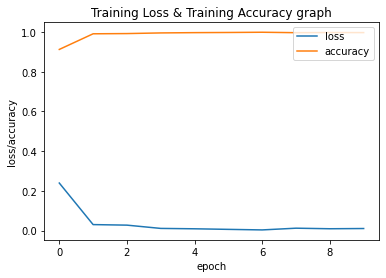

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Training Loss & Training Accuracy graph')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

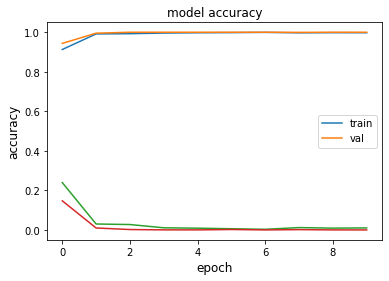

In [ ]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[822   0   0   0]
 [  0 812   0   0]
 [  0   0 798   0]
 [  0   0   0 808]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


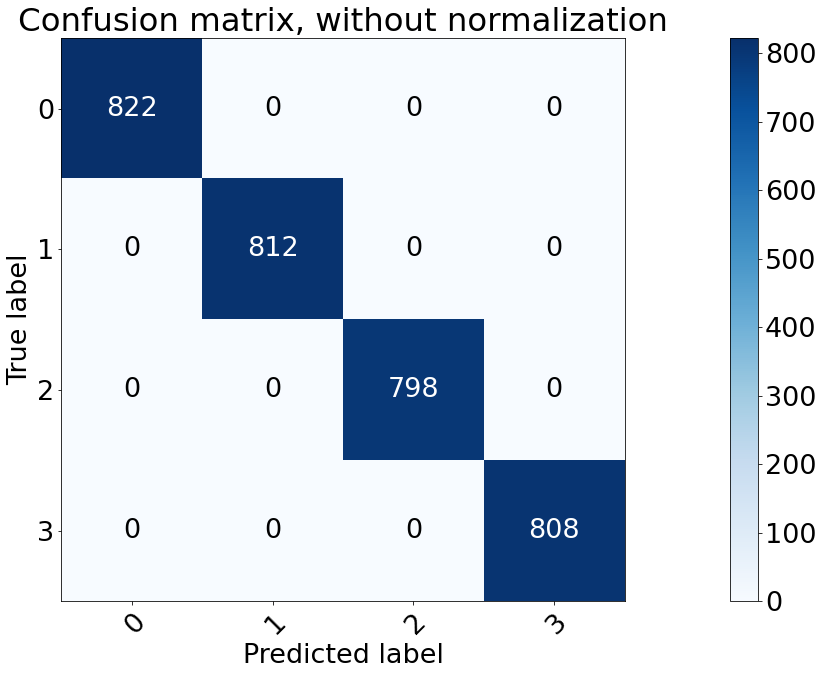

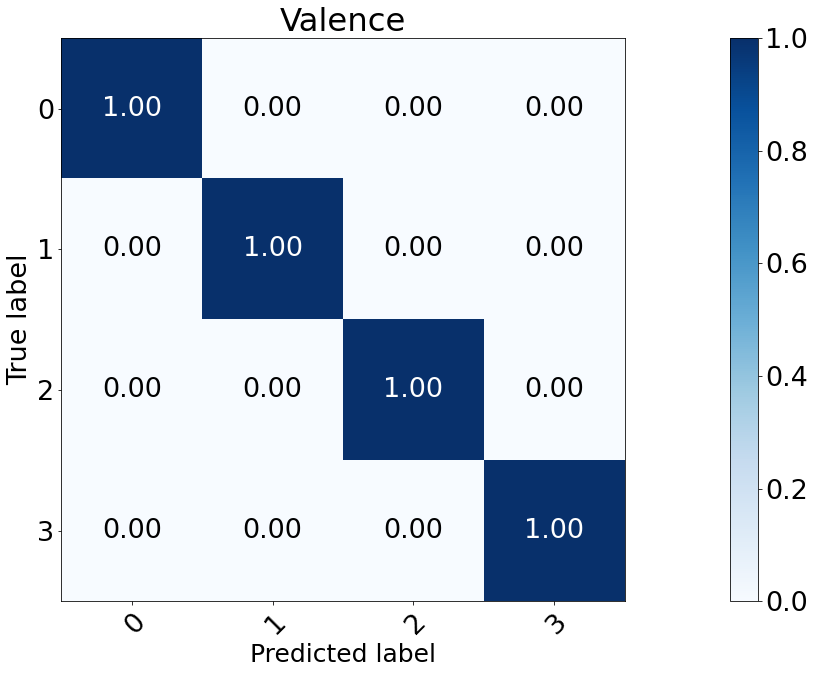

In [ ]:


from sklearn.metrics import confusion_matrix

y_pred = model.predict(testX)
y_test_argmax = testY.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array([0,1, 2, 3])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Valence')
#fig = plt.figure(figsize=(20 ,20), dpi=300) 
plt.xlabel('Predicted label', fontsize=25)
plt.show()
#plt.figure(figsize=(40, 40))

# Objective

```
Test accuracy should be as much high as possible

```
Validation accuracy gives a senses of test accuracy in the run time. We can change the hyperparamters to improve accuracy of the model.


# K Fold validation

In [ ]:
from sklearn.model_selection import KFold

num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold = []
loss_per_fold = []
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, Y):
  model = make_model(input_shape=input_shape)
  
  model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
  )
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(
    X[train],
    Y[train],
    batch_size=batch_size,
    epochs=epochs,
    validation_split = 0.2,
    verbose=1,
  )

   # Generate generalization metrics
  scores = model.evaluate(X[test], Y[test], verbose=1)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
108/108 [==============================] - 19s 162ms/step - loss: 0.2132 - accuracy: 0.9196 - val_loss: 3.8464 - val_accuracy: 0.0440
Epoch 2/10
108/108 [==============================] - 12s 108ms/step - loss: 0.0715 - accuracy: 0.9735 - val_loss: 4.2477 - val_accuracy: 0.1204
Epoch 3/10
108/108 [==============================] - 11s 100ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 3.7545 - val_accuracy: 0.2101
Epoch 4/10
108/108 [==============================] - 11s 100ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 2.2849 - val_accuracy: 0.5168
Epoch 5/10
108/108 [==============================] - 11s 101ms/step - loss: 0.0424 - accuracy: 0.9871 - val_loss: 0.2951 - val_accuracy: 0.9126
Epoch 6/10
108/108 [==============================] - 12s 107ms/step - loss: 0.0211 - accuracy: 0.9946 - val_loss: 0.6500 - val_accuracy: 0.8328
Epoch 7/10
108/108 [=============

In [ ]:
from sklearn.model_selection import KFold
epochs = 20
num_folds = 5
batch_size = 128

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold = []
loss_per_fold = []
h_acc = {}
h_val_acc = {}

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, Y):
  model = make_model(input_shape=input_shape)
  
  model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
  )
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(
    X[train],
    Y[train],
    batch_size=batch_size,
    epochs=epochs,
    validation_split = 0.2,
    verbose=1,
  )

   # Generate generalization metrics
  scores = model.evaluate(X[test], Y[test], verbose=1)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  h_acc[fold_no] = history.history['accuracy']
  h_val_acc[fold_no] = history.history['val_accuracy']

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
52/52 [==============================] - 53s 809ms/step - loss: 0.3601 - accuracy: 0.8666 - val_loss: 3.3950 - val_accuracy: 0.0000e+00
Epoch 2/20
52/52 [==============================] - 23s 435ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 5.4155 - val_accuracy: 0.0000e+00
Epoch 3/20
52/52 [==============================] - 17s 326ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 4.4720 - val_accuracy: 0.0306
Epoch 4/20
52/52 [==============================] - 13s 241ms/step - loss: 7.8713e-04 - accuracy: 1.0000 - val_loss: 4.0462 - val_accuracy: 0.1028
Epoch 5/20
52/52 [==============================] - 13s 260ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 3.1504 - val_accuracy: 0.2548
Epoch 6/20
52/52 [==============================] - 13s 255ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.8429 - val_accuracy: 0.8119
Epoch 7/20
52/52 [===============

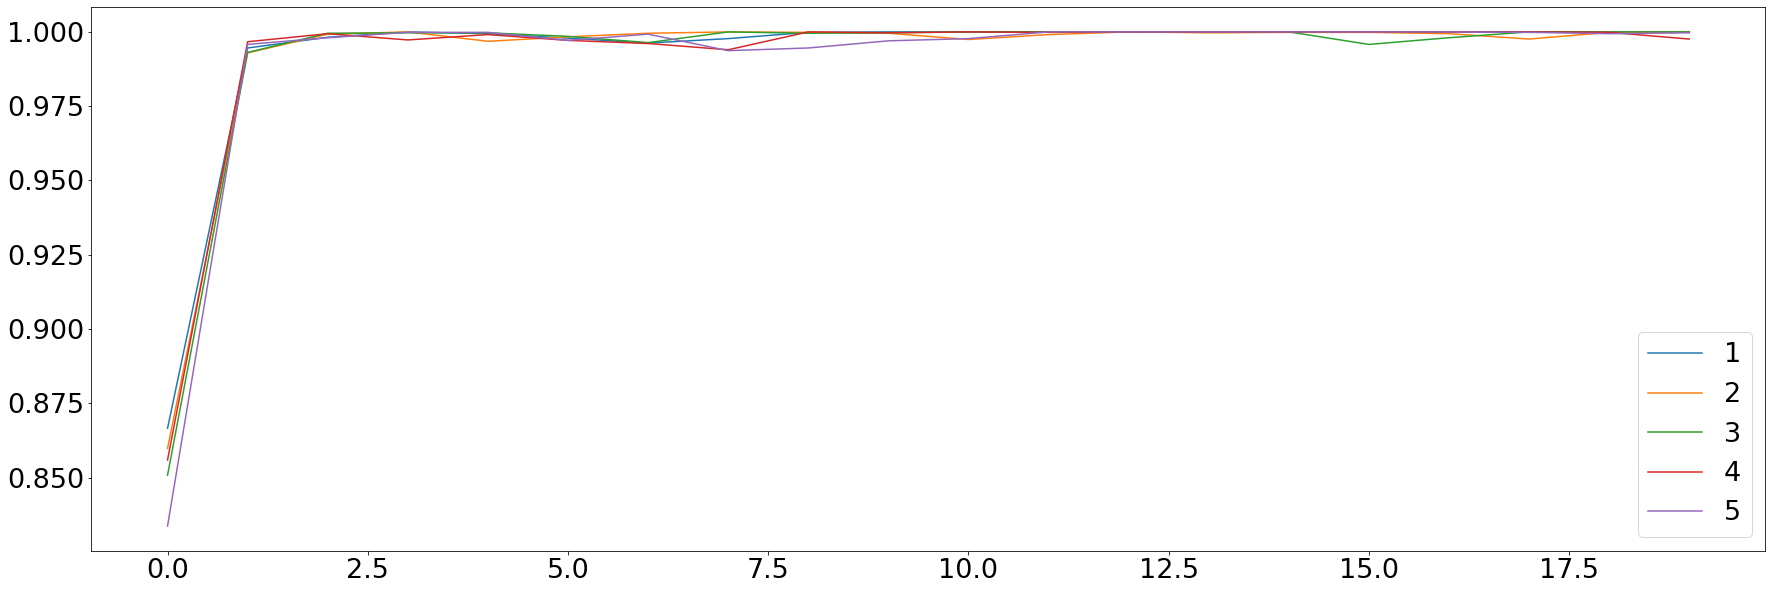

In [ ]:
acc_10 = pd.DataFrame.from_dict(h_acc)
acc_10.plot()

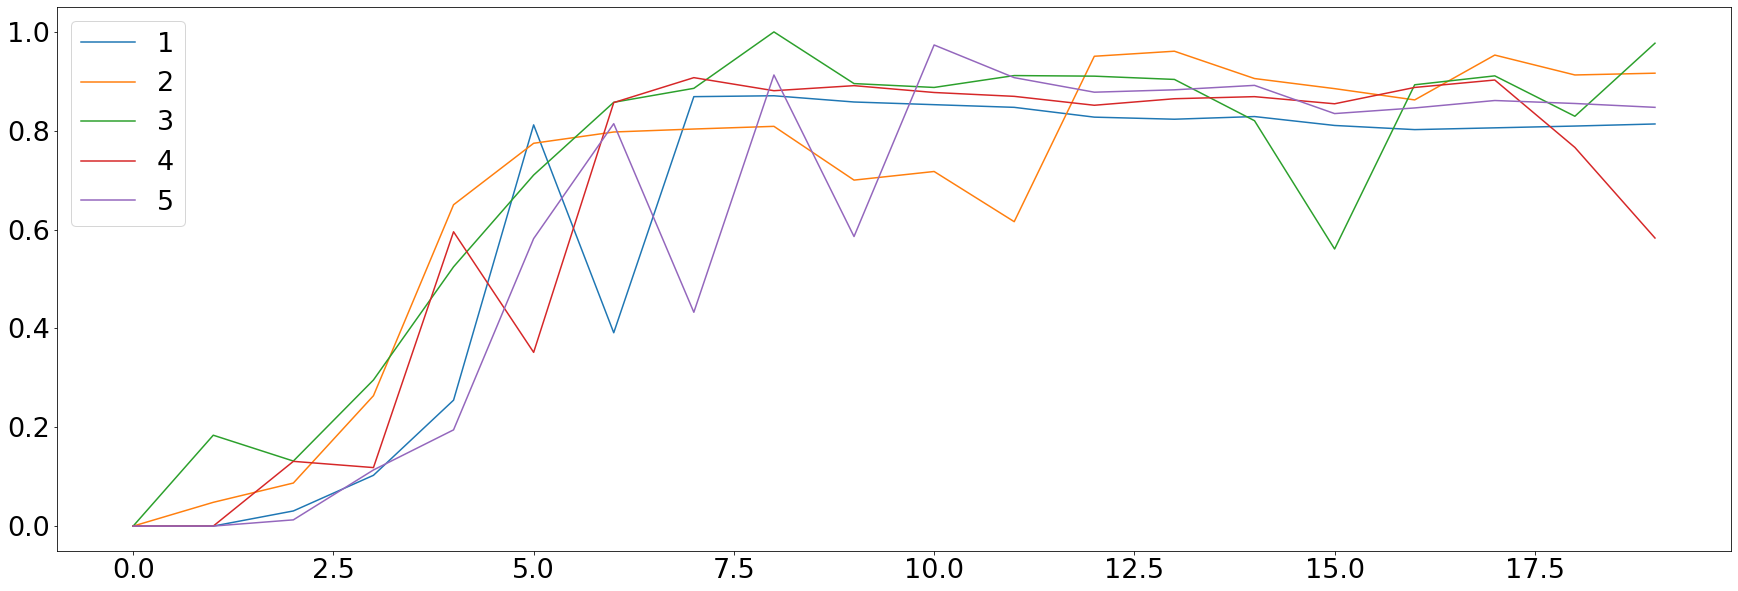

In [ ]:
val_acc_10 = pd.DataFrame.from_dict(h_val_acc)
val_acc_10.plot()